In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys

In [2]:
from scipy.spatial.distance import pdist, squareform

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

#### Performing clustering on the Classyfire chemicals

In [4]:
TOP

'/home/grace/Documents/python/tsca_categories/'

In [5]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [6]:
from model_functions import *

In [7]:
tsca_df = pd.read_excel(interim_dir+'TSCA_all_110822.xlsx', sheet_name = 'TSCA_ALL', index_col = 0)

In [8]:
tsca_df.shape

(14247, 100)

In [9]:
#tsca_df.info()

In [10]:
tsca_df.rename(columns = {'SMILES': 'smiles'}, inplace = True)

#### Explore the value counts using the ClassyFire categories assignments

<AxesSubplot:>

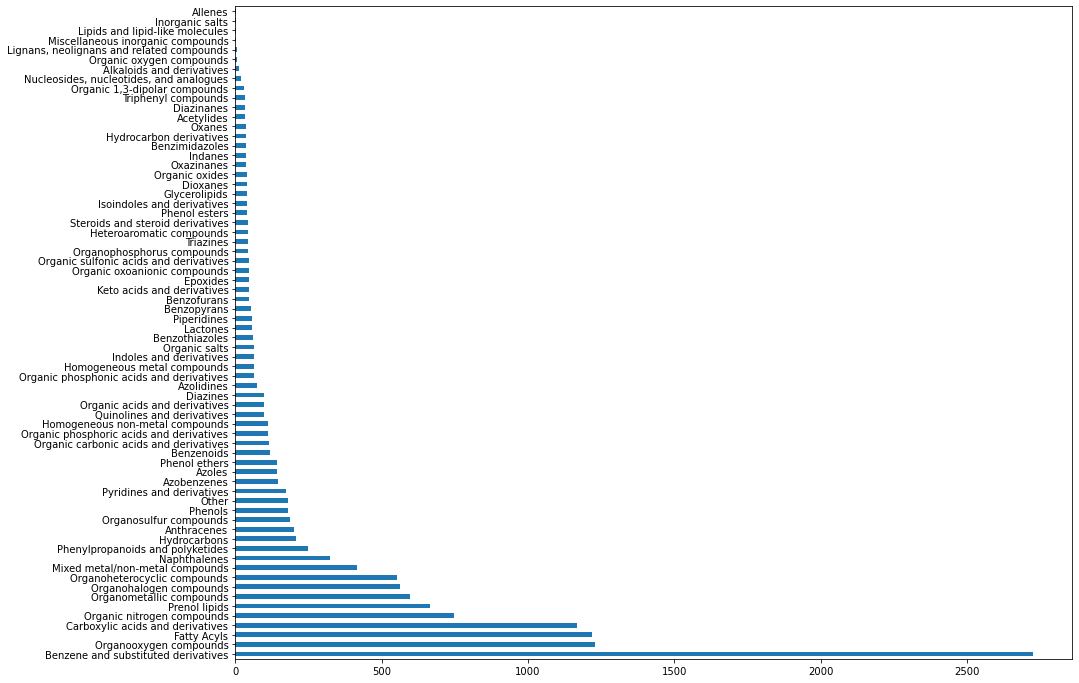

In [11]:
tsca_df.ClassyFire.value_counts().plot.barh(figsize = (15,12))

In [12]:
print('There were {} unique ClassyFire categories for the TSCA universe wich present our pragmatic starting set'.format(tsca_df.ClassyFire.nunique()))

There were 68 unique ClassyFire categories for the TSCA universe wich present our pragmatic starting set


#### Create a dictionary of FP matrices to be able to call them as needed.

In [13]:
results = {}
for i, group in tsca_df.groupby('ClassyFire'):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results[i] = a

RDKit ERROR: [11:53:40] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [11:53:40] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [11:53:50] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:53:50] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:53:50] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:53:50] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:53:54] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [11:53:54] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [11:53:54] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [11:53:55] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [11:53:55] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [11:53:59] SMILES Parse Error: syntax er

In [14]:
results['Benzothiazoles']

,mrgn_0,mrgn_1,mrgn_2,mrgn_3,mrgn_4,mrgn_5,mrgn_6,mrgn_7,mrgn_8,mrgn_9,...,mrgn_1014,mrgn_1015,mrgn_1016,mrgn_1017,mrgn_1018,mrgn_1019,mrgn_1020,mrgn_1021,mrgn_1022,mrgn_1023
DTXSID1020146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2066983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
DTXSID7068057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
DTXSID7063182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8062604,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID1020807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4066963,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
DTXSID8071146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
DTXSID2062082,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
distances = {}
for k,v in results.items():
    a = distance_matrix(results[k])
    distances[k] = a

In [16]:
#{k:v.shape for k,v in results.items()}

In [17]:
centres = []
for i,group in tsca_df.groupby('ClassyFire'):
    try:
        m = medoid_calc(distances[i])
        centres.append(m)
    except Exception as error:
        print(error)

In [18]:
len(centres)

68

In [19]:
tsca_df['cluster_centroid'] = tsca_df['dtxsid'].apply(lambda x: 'centroid' if x in (centres) else np.nan)

#### Create dictionary of the distances so we can compute the pairwise distance from the given centroid of each ClassyFire category

In [20]:
df2 = tsca_df.set_index('dtxsid')

In [21]:
members = {}

for i, group in df2.groupby('ClassyFire'):
    subset = group[['ClassyFire', 'cluster_centroid']]
    #print(subset)
    try: 
        for x, y in subset.iterrows():
            a, b = y
            if b == 'centroid':
                #print(x)
                c = [distances[i][x].index, distances[i][x].values]
                members[x] = c
    except Exception as error:
            print(error)


In [22]:
cluster_members = pd.DataFrame(list(members.items()))
cluster_members.columns = ['centroid', 1]
cluster_members[['analogues','Dist']] = pd.DataFrame(cluster_members[1].tolist(), index= cluster_members.index)
cluster_members.drop([1], axis = 1, inplace = True)
cluster_members2 = cluster_members.apply(pd.Series.explode)

In [23]:
cluster_members2.head(10)

,centroid,analogues,Dist
0,DTXSID4063036,DTXSID30870753,0.434783
0,DTXSID4063036,DTXSID7062374,0.409091
0,DTXSID4063036,DTXSID9061097,0.045455
0,DTXSID4063036,DTXSID1061233,0.5
0,DTXSID4063036,DTXSID4061096,0.045455
0,DTXSID4063036,DTXSID8072405,0.419355
0,DTXSID4063036,DTXSID0066955,0.5
0,DTXSID4063036,DTXSID6026379,0.954545
0,DTXSID4063036,DTXSID7060835,0.565217
0,DTXSID4063036,DTXSID60870766,0.045455


In [24]:
df_1 = tsca_df.sort_values(by = ['ClassyFire', 'cluster_centroid'], ascending = [True, False])

In [25]:
df_1['centroid'] = df_1.apply(lambda x: x['dtxsid'] if x['cluster_centroid'] == 'centroid' else np.nan, axis = 1)

In [26]:
df_1['centroid2'] = df_1['centroid'].fillna(method = 'ffill')

In [27]:
mydict = {}
for i, group in df_1.groupby('centroid2'):
    k = [n for n in group['centroid2'] if n != ' '][0]
    v = list(group['dtxsid'])
    mydict[k] = v

In [28]:
dist = []
for i, group in cluster_members2.groupby('centroid'):
    a = cluster_members2[(cluster_members2['centroid'] == i) & (cluster_members2['analogues'].isin(mydict[i]))]
    dist.append(a)

In [29]:
dist_df = pd.concat([e for e in dist])
final_df = pd.merge(df_1, dist_df, left_on = 'dtxsid', right_on = 'analogues', how = 'left')
final_df.rename(columns = {'centroid_x': 'centroid'}, inplace = True)
final_df.drop(['centroid_y'], axis = 1, inplace = True)
final_df.head()

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,IN_SIGMA-ALDRICH,Kingdom,Superclass,Class,ClassyFire,cluster_centroid,centroid,centroid2,analogues,Dist
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,1.0,Organic compounds,Acetylides,N/a,Acetylides,centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.0
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,1.0,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,1.0,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,1.0,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,1.0,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID1061233,0.5


<AxesSubplot:>

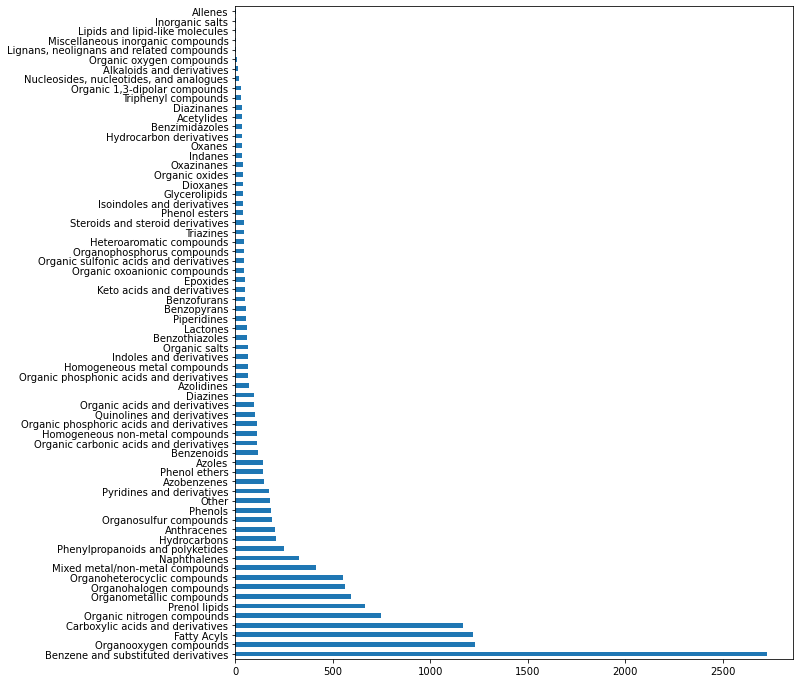

In [30]:
fig, ax = plt.subplots()
final_df.ClassyFire.value_counts().plot.barh(figsize = (10,12))
#ax.set_xscale('log')

In [31]:
d = {k:len(v) for k,v in distances.items()} 
#sorted(d.items(), key=lambda x: x[1], reverse=False)

In [32]:
lt65 = {k:v for k,v in d.items() if v <= 65}

In [33]:
#final_df[final_df['ClassyFire'] == list(lt65.keys())[0]]

In [141]:
len(list(lt65.keys()))

39

In [263]:
gte65 = {k:v for k,v in d.items() if v >65}

In [64]:
gte65 = len({k:v for k,v in d.items() if v >65})

What do the pairwise distributions look like for groups with more than 65 members

In [65]:
summaries = []
for k,v in distances.items():
    if len(v)  > 65:
        summaries.append(plug_in(distances[k], label = k))

In [66]:
len(summaries)

29

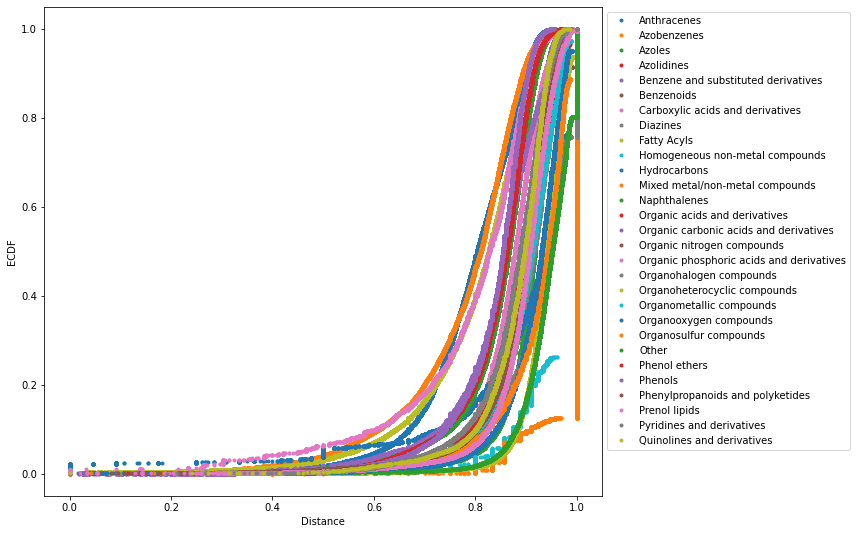

In [67]:
fig, ax = plt.subplots(figsize = (10,9))
for i in range(len(summaries)):
    ax.set_xlabel('Distance')
    ax.set_ylabel('ECDF')
    #ax.set_title('ECDFs of within Category-Subcategory combinations')
    ax.plot(summaries[i]['ecdfx'],summaries[i]['ecdfy'], marker = '.', linestyle = 'none', label = summaries[i]['label'])
    ax.legend(bbox_to_anchor=(1, 1))

For groups with less than 65 members - consider identification of additional members for testing using a MaxMin Picker approach

In [71]:
list(lt65.keys())[:5]

['Acetylides',
 'Alkaloids and derivatives',
 'Allenes',
 'Benzimidazoles',
 'Benzofurans']

In [104]:
 from rdkit import Chem

In [128]:
test_df = final_df[final_df['ClassyFire'] == 'Acetylides']

In [129]:
test_dict = {k:Chem.MolFromSmiles(v) for k,v in zip(test_df['dtxsid'], test_df['smiles'])}

In [130]:
mrgn_dict = [AllChem.GetMorganFingerprintAsBitVect(i, 3, 1024) for i in test_dict.values()]

In [131]:
len(mrgn_dict)

33

In [132]:
picker = MaxMinPicker()
picker

In [133]:
def distij(i,j,fps=mrgn_dict):
...   return 1-DataStructs.FingerprintSimilarity(fps[i],fps[j])

In [134]:
pickIndices = picker.LazyPick(distij,33, 5,seed=0)

In [135]:
ms_index = {k:v for k,v in enumerate(test_dict.keys())}    

In [136]:
help(DataStructs.FingerprintSimilarity)

Help on function FingerprintSimilarity in module rdkit.DataStructs:

FingerprintSimilarity(fp1, fp2, metric=<Boost.Python.function object at 0x5654324f77d0>)
    returns the calculated similarity between two fingerprints,
    handles any folding that may need to be done to ensure that they
    are compatible



In [137]:
Acetylides_picks= {'Acetylides': [ms_index[x] for x in pickIndices]}

In [138]:
Acetylides_picks

{'Acetylides': ['DTXSID1022136',
  'DTXSID6026379',
  'DTXSID9062647',
  'DTXSID70871320',
  'DTXSID8072405']}

In [148]:
def content_max(df,  k = None):
    content = {}
    tdf = df[df['ClassyFire'] == k]
    content['t_dict'] = {k:Chem.MolFromSmiles(v) for k,v in zip(tdf['dtxsid'], tdf['smiles'])}
    content['fp_dict'] = [AllChem.GetMorganFingerprintAsBitVect(i, 3, 1024) for i in content['t_dict'].values()]
    content['nfp_dict'] = len(content['fp_dict'])
    content['t_index'] = {k:v for k,v in enumerate(content['t_dict'].keys())} 
    content['k'] = k
    return content

In [151]:
#content_max(final_df, 'Acetylides')

In [163]:
lte_summaries = []
for k in list(lt65.keys()):
    try:
        lte_summaries.append(content_max(final_df, k))
    except Exception as error:
        print(k)

Homogeneous metal compounds
Keto acids and derivatives
Organic salts
Organophosphorus compounds


RDKit ERROR: [13:12:42] SMILES Parse Error: syntax error while parsing: -
RDKit ERROR: [13:12:42] SMILES Parse Error: Failed parsing SMILES '-' for input: '-'
RDKit ERROR: [13:12:42] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [13:12:42] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [13:12:42] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [13:12:42] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [13:12:42] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [13:12:42] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [13:12:42] Explicit valence for atom # 14 Cl, 2, is greater than permitted


In [166]:
lte_keys = [ lte_summaries[i]['k'] for i in range(len(lte_summaries))]
   

#### Looks like only 35 out of the 39 lt 65 groups could be processed. 

In [169]:
[e for e in list(lt65.keys()) if e not in  lte_keys ]

['Homogeneous metal compounds',
 'Keto acids and derivatives',
 'Organic salts',
 'Organophosphorus compounds']

In [170]:
picker = MaxMinPicker()

In [ ]:
def distij(i,j,fps=mrgn_dict):
...   return 1-DataStructs.FingerprintSimilarity(fps[i],fps[j])

In [ ]:
pickIndices = picker.LazyPick(distij,33, 5,seed=0)

In [184]:
def distij(i,j,fps=None):
...   return 1-DataStructs.FingerprintSimilarity(fps[i],fps[j])

In [187]:
def picker_func(fps, n1, n2 =5, label = None, fps_index = None):
    picker_dict = {}
    mmp = MaxMinPicker()
    picker_dict['label'] = label
    picker_dict['indices'] = mmp.LazyBitVectorPick(fps,n1, n2,seed=0)
    picker_dict['diverse_chems'] = [fps_index[x] for x in picker_dict['indices']]
    return picker_dict

In [188]:
picker_func(lte_summaries[0]['fp_dict'], n1 =lte_summaries[0]['nfp_dict'], n2 = 5, label = lte_summaries[0]['k'], fps_index = lte_summaries[0]['t_index']  )

{'label': 'Acetylides',
 'indices': <rdkit.rdBase._vecti at 0x7f05087b4bd0>,
 'diverse_chems': ['DTXSID1022136',
  'DTXSID6026379',
  'DTXSID9062647',
  'DTXSID70871320',
  'DTXSID8072405']}

In [191]:
picker_lst = []
for i in range(len(lte_summaries)):
    if lte_summaries[i]['nfp_dict'] > 5:
        picker_lst.append(picker_func(lte_summaries[i]['fp_dict'], n1 =lte_summaries[i]['nfp_dict'], n2 = 5, label = lte_summaries[i]['k'], fps_index = lte_summaries[i]['t_index']  ))

In [195]:
picker_lst[2]

{'label': 'Benzimidazoles',
 'indices': <rdkit.rdBase._vecti at 0x7f0508600750>,
 'diverse_chems': ['DTXSID8073001',
  'DTXSID00924797',
  'DTXSID70949952',
  'DTXSID2052520',
  'DTXSID8020965']}

In [215]:
len(picker_lst)

30

#### Create one big list of all picked chemicals to tag to the final_df dataframe. Add the existing centroids originally calculated for these groups

In [217]:
mylst2 = []
for i in range(len(picker_lst)):
    mylst2.append(picker_lst[i]['diverse_chems'])

In [220]:
mylst2 = [e for a in mylst2 for e in a]

In [222]:
final_df['lt65_picks'] = final_df['dtxsid'].apply(lambda x: 1 if x in mylst2 else 0)

In [226]:
final_df[final_df['ClassyFire'] =='Acetylides' ].head()

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,Kingdom,Superclass,Class,ClassyFire,cluster_centroid,centroid,centroid2,analogues,Dist,lt65_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,Organic compounds,Acetylides,N/a,Acetylides,centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.0,0
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783,0
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091,0
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455,0
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID1061233,0.5,0


In [245]:
lt65_picks_v1 = []
for i, row in final_df.iterrows():
    if row['ClassyFire'] in list(lt65.keys()) and row['cluster_centroid'] == "centroid":
        lt65_picks_v1.append(1)
    elif (row['lt65_picks'] == 1):
        lt65_picks_v1.append(1)
    else:
        lt65_picks_v1.append(0)
        
        

In [246]:
lt65_picks_v1
np.count_nonzero(np.array(lt65_picks_v1) == 1)

189

In [247]:
final_df['lt65_picks'] = lt65_picks_v1

#### Sanity checks

In [248]:
final_df[final_df['ClassyFire'] =='Acetylides' ].head()

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,Kingdom,Superclass,Class,ClassyFire,cluster_centroid,centroid,centroid2,analogues,Dist,lt65_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,Organic compounds,Acetylides,N/a,Acetylides,centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.0,1
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783,0
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091,0
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455,0
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID1061233,0.5,0


In [249]:
final_df[final_df['lt65_picks'] ==1]

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,Kingdom,Superclass,Class,ClassyFire,cluster_centroid,centroid,centroid2,analogues,Dist,lt65_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,Organic compounds,Acetylides,N/a,Acetylides,centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.0,1
6,DTXSID8072405,"1,11-Hexadecadiyne",71673-32-0,GRDDITZXHDRNNP-UHFFFAOYSA-N,"Hexadeca-1,11-diyne",CCCCC#CCCCCCCCCC#C,InChI=1S/C16H26/c1-3-5-7-9-11-13-15-16-14-12-1...,C16H26,218.384,218.203451,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID8072405,0.419355,1
8,DTXSID6026379,Ethyne,74-86-2,HSFWRNGVRCDJHI-UHFFFAOYSA-N,Acetylene,C#C,InChI=1S/C2H2/c1-2/h1-2H,C2H2,26.038,26.015650,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID6026379,0.954545,1
18,DTXSID1022136,3-Butyn-1-ol,927-74-2,OTJZCIYGRUNXTP-UHFFFAOYSA-N,But-3-yn-1-ol,OCCC#C,"InChI=1S/C4H6O/c1-2-3-4-5/h1,5H,3-4H2",C4H6O,70.091,70.041865,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID1022136,0.730769,1
19,DTXSID70871320,"1-Butyne, 3-chloro-",21020-24-6,PZFBULOUMNPBFA-UHFFFAOYSA-N,3-Chlorobut-1-yne,CC(Cl)C#C,"InChI=1/C4H5Cl/c1-3-4(2)5/h1,4H,2H3",C4H5Cl,88.530,88.007978,...,Organic compounds,Acetylides,N/a,Acetylides,NaN,NaN,DTXSID4063036,DTXSID70871320,0.857143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,DTXSID3052511,Trityl chloride,76-83-5,JBWKIWSBJXDJDT-UHFFFAOYSA-N,"1,1',1''-(Chloromethanetriyl)tribenzene",ClC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,"InChI=1S/C19H15Cl/c20-19(16-10-4-1-5-11-16,17-...",C19H15Cl,278.780,278.086228,...,Organic compounds,Benzenoids,Triphenyl compounds,Triphenyl compounds,NaN,NaN,DTXSID20888680,DTXSID3052511,0.9,1
14226,DTXSID7060049,"Benzenemethanol, 4-amino-.alpha.,.alpha.-bis(4...",467-62-9,KRVRUAYUNOQMOV-UHFFFAOYSA-N,Tris(4-aminophenyl)methanol,NC1=CC=C(C=C1)C(O)(C1=CC=C(N)C=C1)C1=CC=C(N)C=C1,"InChI=1S/C19H19N3O/c20-16-7-1-13(2-8-16)19(23,...",C19H19N3O,305.381,305.152812,...,Organic compounds,Benzenoids,Triphenyl compounds,Triphenyl compounds,NaN,NaN,DTXSID20888680,DTXSID7060049,0.882353,1
14227,DTXSID6074964,"Adenosine, N-benzoyl-5'-O-[bis(4-methoxyphenyl...",64325-78-6,LPICNYATEWGYHI-WIHCDAFUSA-N,N-Benzoyl-5'-O-[bis(4-methoxyphenyl)(phenyl)me...,COC1=CC=C(C=C1)C(OC[C@H]1O[C@H](C[C@@H]1O)N1C=...,InChI=1S/C38H35N5O6/c1-46-29-17-13-27(14-18-29...,C38H35N5O6,657.727,657.258734,...,Organic compounds,Benzenoids,Triphenyl compounds,Triphenyl compounds,NaN,NaN,DTXSID20888680,DTXSID6074964,0.828829,1
14233,DTXSID3060530,Leucogentian violet,603-48-5,OAZWDJGLIYNYMU-UHFFFAOYSA-N,"4,4',4''-Methanetriyltris(N,N-dimethylaniline)",CN(C)C1=CC=C(C=C1)C(C1=CC=C(C=C1)N(C)C)C1=CC=C...,InChI=1S/C25H31N3/c1-26(2)22-13-7-19(8-14-22)2...,C25H31N3,373.544,373.251798,...,Organic compounds,Benzenoids,Triphenyl compounds,Triphenyl compounds,NaN,NaN,DTXSID20888680,DTXSID3060530,0.90566,1


#### Objectvely identifying the cluster height to pick for the gte65 groups

In [251]:
def height(Z):
    h = [y[1] for y in dendrogram(Z)['dcoord']]
    return h

In [252]:
def create_bootstraps(df, n = 10):
    perm = []
    for i in range(0,n):
        Xp = df.apply(lambda x: x.sample(frac = 1).values)
        perm.append(Xp)
    return perm

In [253]:
def cluster_Z(lst):
    perm_Z = []
    for i in range(0, len(lst)):
        perm_Z.append(linkage(squareform(lst[i]), 'ward'))
    return perm_Z

In [254]:
def perm_height(lst):
    perm_h = []
    for i in range(0, len(lst)):
        perm_h.append(height(lst[i]))
    return perm_h

In [255]:
def jaccard_index(df):
    D_mgrn = pd.DataFrame(squareform(pdist(df, 'jaccard')), columns = df.index, index = df.index)
    return D_mgrn


In [256]:
def create_bootstrap_dist(lst):
    mylst = []
    for i in range(0, len(lst)):
        mylst.append(jaccard_index(lst[i]))
    return mylst

In [270]:
def create_De(df, label = None, n = 10):
    summary = {}
    summary['label'] = label
    summary['perm_samples'] = create_bootstraps(df, n = 10)
    summary['perm_dist'] = create_bootstrap_dist(summary['perm_samples'])
    summary['perm_Z'] = cluster_Z(summary['perm_dist'])
    summary['perm_height'] = perm_height(summary['perm_Z'])
    summary['perm_df'] = pd.concat([pd.Series(ecdf(summary['perm_height'][i])[0]) for i in range(len(summary['perm_height']))], axis = 1)
    summary['De'] = summary['perm_df'].apply(lambda x: np.mean(x), axis = 1)
    summary['QQ_De'] = [np.percentile(summary['De'], i) for i in range(1,101)]
    return summary


In [258]:
def create_Do(D, label= None):
    summary = {}
    Zc = linkage(squareform(D), 'ward')
    summary['Z'] = Zc
    summary['heights'] = [y[1] for y in dendrogram(Zc)['dcoord']]
    summary['ecdfx'], summary['ecdfx'] = ecdf(summary['heights'])
    summary['Do'] = summary['ecdfx']
    summary['label'] = label
    summary['QQ_Do'] = [np.percentile(summary['Do'], i) for i in range(1,101)]
    return summary

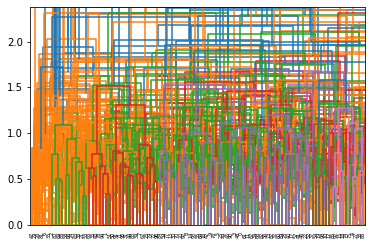

In [264]:
summary_Do = []
for k, v in distances.items():
    if k in gte65.keys():
        summary_Do.append(create_Do(distances[k], label = k))

In [267]:
len(summary_Do)

29

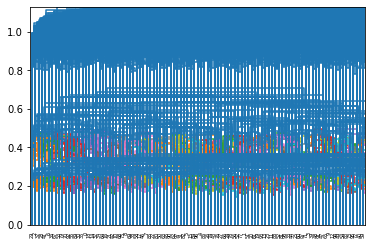

In [271]:
summary_De = []
for k,v in distances.items():
    if k in gte65.keys():
        try:
            cd = create_De(distances[k], label = k)
        except Exception as error:
            print(k, error)
        else:
            summary_De.append(cd)

In [272]:
cluster_heights = {}
for i in range(0, len(summary_De)):
    cluster_heights[summary_De[i]['label']] = np.percentile(summary_De[i]['De'], [90, 95, 99])  

In [275]:
cluster_heights

{'Anthracenes': array([1.02201611, 1.03122077, 1.04464784]),
 'Azobenzenes': array([1.02286644, 1.03062551, 1.04163447]),
 'Azoles': array([1.03108308, 1.04651932, 1.0675018 ]),
 'Azolidines': array([1.04539316, 1.06231049, 1.08134491]),
 'Benzene and substituted derivatives': array([1.00408779, 1.0087477 , 1.01855479]),
 'Benzenoids': array([1.0309661 , 1.04286226, 1.06045945]),
 'Carboxylic acids and derivatives': array([1.00884877, 1.01611205, 1.03033579]),
 'Diazines': array([1.04303933, 1.05881852, 1.08929319]),
 'Fatty Acyls': array([1.00847646, 1.01567039, 1.02959134]),
 'Homogeneous non-metal compounds': array([0.51978853, 0.5625336 , 0.63085134]),
 'Hydrocarbons': array([0.95624335, 0.98951378, 1.04928853]),
 'Mixed metal/non-metal compounds': array([0.27338549, 0.29343848, 0.33199832]),
 'Naphthalenes': array([1.01741116, 1.02466599, 1.0372832 ]),
 'Organic acids and derivatives': array([1.04355764, 1.06349907, 1.10008764]),
 'Organic carbonic acids and derivatives': array([1

In [279]:
from scipy.cluster.hierarchy import fcluster

In [277]:
for i in range(len(summaries)):
    print(i, summaries[i]['label'])

0 Anthracenes
1 Azobenzenes
2 Azoles
3 Azolidines
4 Benzene and substituted derivatives
5 Benzenoids
6 Carboxylic acids and derivatives
7 Diazines
8 Fatty Acyls
9 Homogeneous non-metal compounds
10 Hydrocarbons
11 Mixed metal/non-metal compounds
12 Naphthalenes
13 Organic acids and derivatives
14 Organic carbonic acids and derivatives
15 Organic nitrogen compounds
16 Organic phosphoric acids and derivatives
17 Organohalogen compounds
18 Organoheterocyclic compounds
19 Organometallic compounds
20 Organooxygen compounds
21 Organosulfur compounds
22 Other
23 Phenol ethers
24 Phenols
25 Phenylpropanoids and polyketides
26 Prenol lipids
27 Pyridines and derivatives
28 Quinolines and derivatives


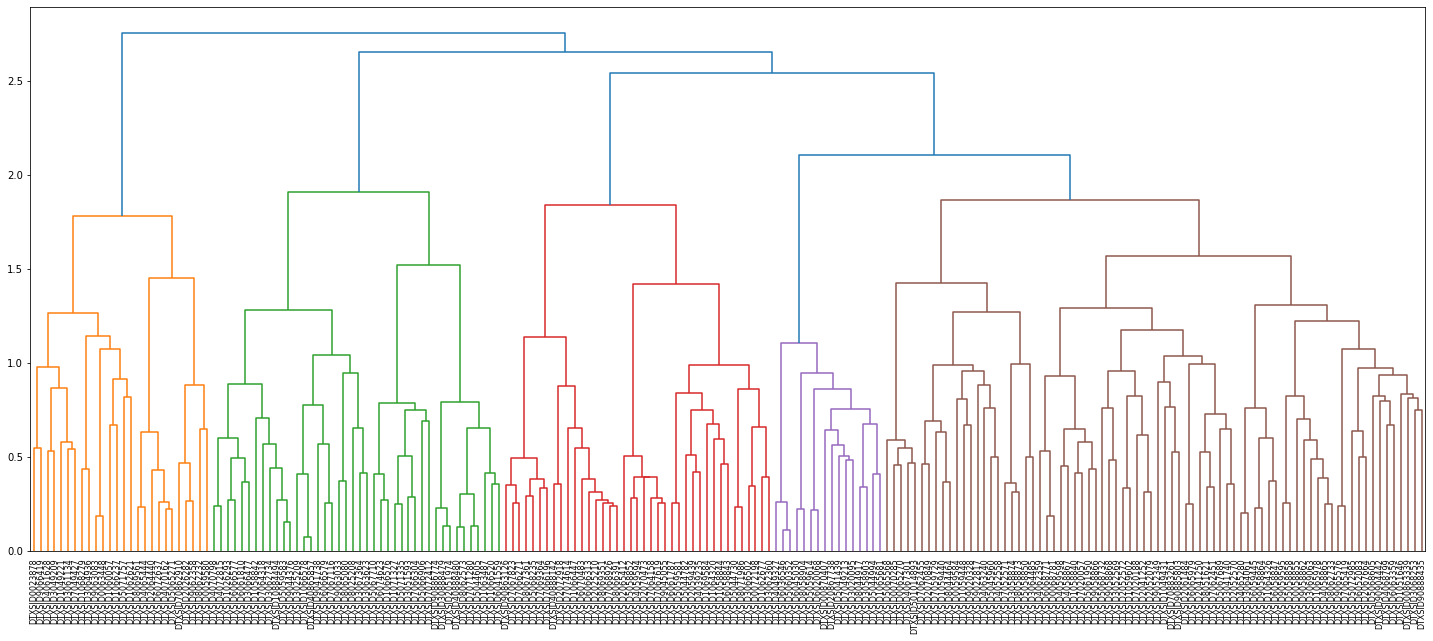

In [349]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[0]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results[('Anthracenes')].index# font size for the x axis labels
)
plt.show()

In [350]:
max_d = 9
clusters_dist = fcluster(summaries[0]['Z'], max_d, criterion='maxclust')
clusters_dist
dist_clusters = pd.DataFrame(list(zip(results['Anthracenes'].index, clusters_dist)), columns = ['dtxsid', 'cluster_d'])
dist_clusters['category'] = 'Anthracenes'
dist_clusters = dist_clusters[['dtxsid', 'cluster_d',  'category']]

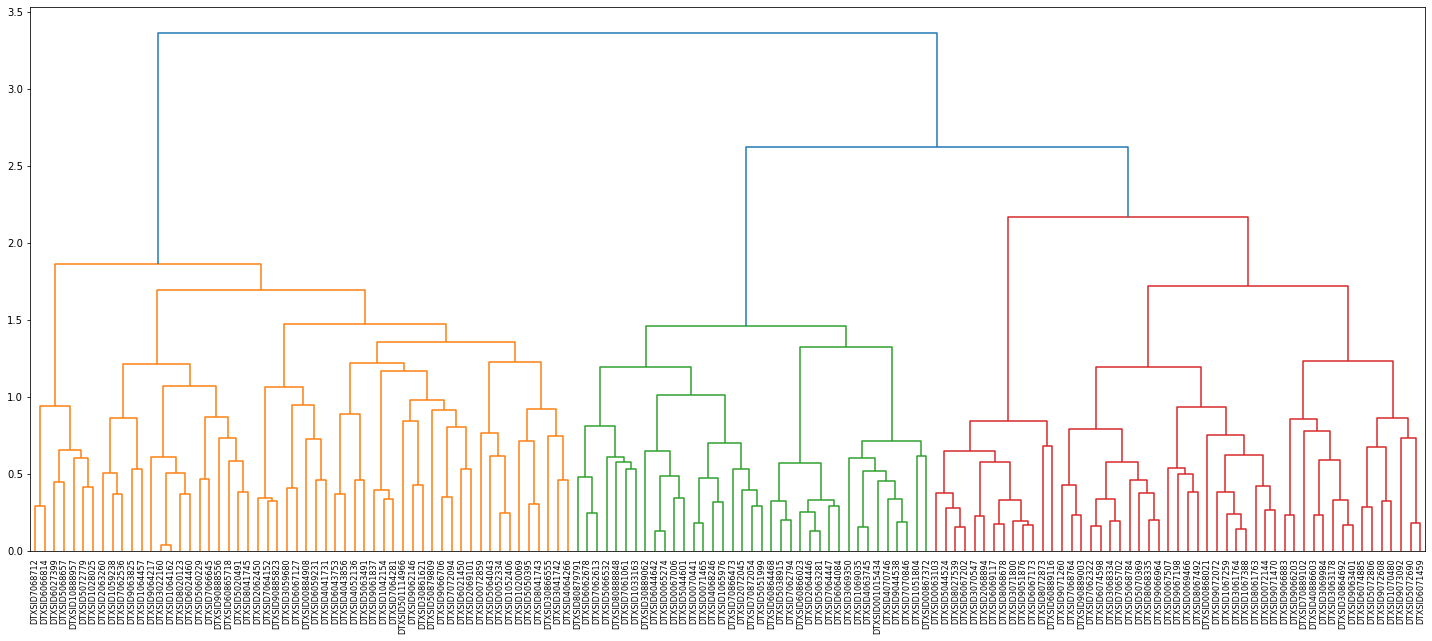

In [351]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[1]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Azobenzenes'].index# font size for the x axis labels
)
plt.show()



In [352]:
max_d =7
clusters_dist1 = fcluster(summaries[1]['Z'], max_d, criterion='maxclust')
clusters_dist1
dist_clusters1 = pd.DataFrame(list(zip(results['Azobenzenes'].index, clusters_dist1)), columns = ['dtxsid', 'cluster_d'])
dist_clusters1['category'] = 'Azobenzenes'
dist_clusters1 = dist_clusters1[['dtxsid', 'cluster_d',  'category']]

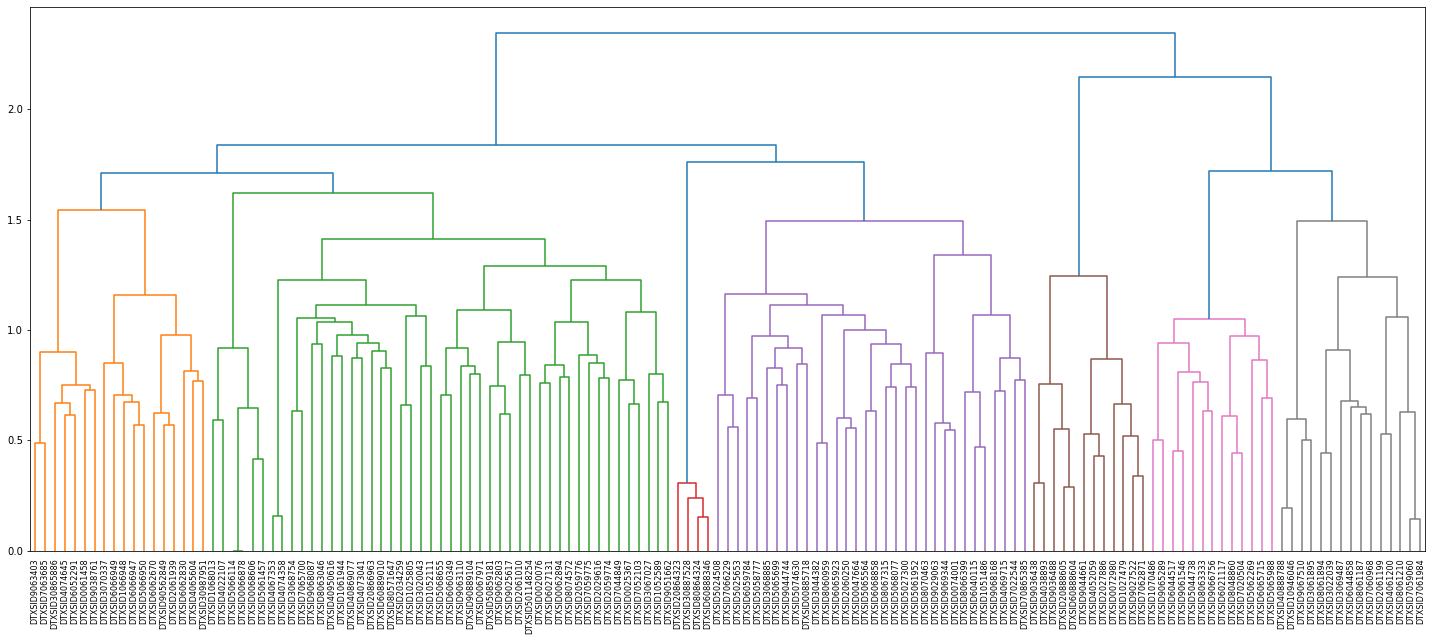

In [353]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[2]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Azoles'].index# font size for the x axis labels
)
plt.show()

In [355]:
max_d = 7
clusters_dist2 = fcluster(summaries[2]['Z'], max_d, criterion='maxclust')
clusters_dist2
dist_clusters2 = pd.DataFrame(list(zip(results['Azoles'].index, clusters_dist2)), columns = ['dtxsid', 'cluster_d'])
dist_clusters2['category'] = 'Azoles'

dist_clusters2 = dist_clusters2[['dtxsid', 'cluster_d',  'category']]


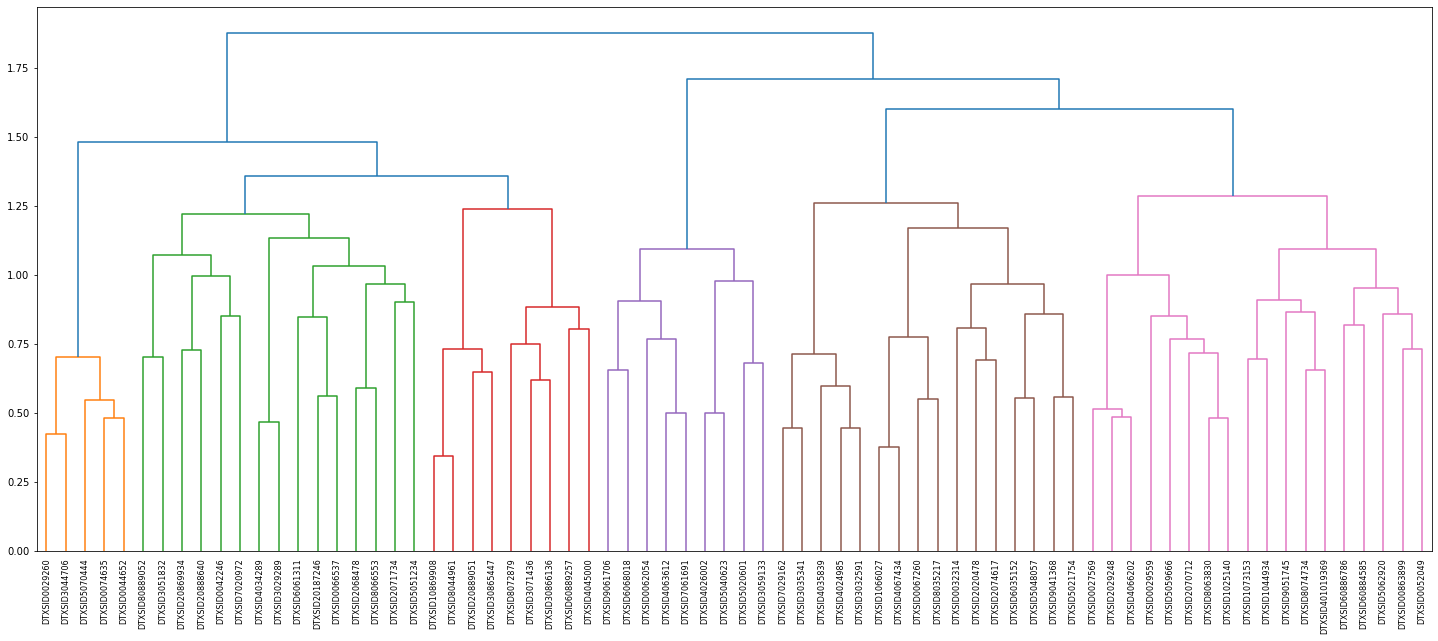

In [356]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[3]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Azolidines' ].index# font size for the x axis labels
)
plt.show()

In [357]:
max_d = 6
clusters_dist28 = fcluster(summaries[3]['Z'], max_d, criterion='maxclust')
clusters_dist28
dist_clusters28 = pd.DataFrame(list(zip(results['Azolidines'].index, clusters_dist28)), columns = ['dtxsid', 'cluster_d'])
dist_clusters28['category'] = 'Azolidines'

dist_clusters28 = dist_clusters28[['dtxsid', 'cluster_d',  'category']]

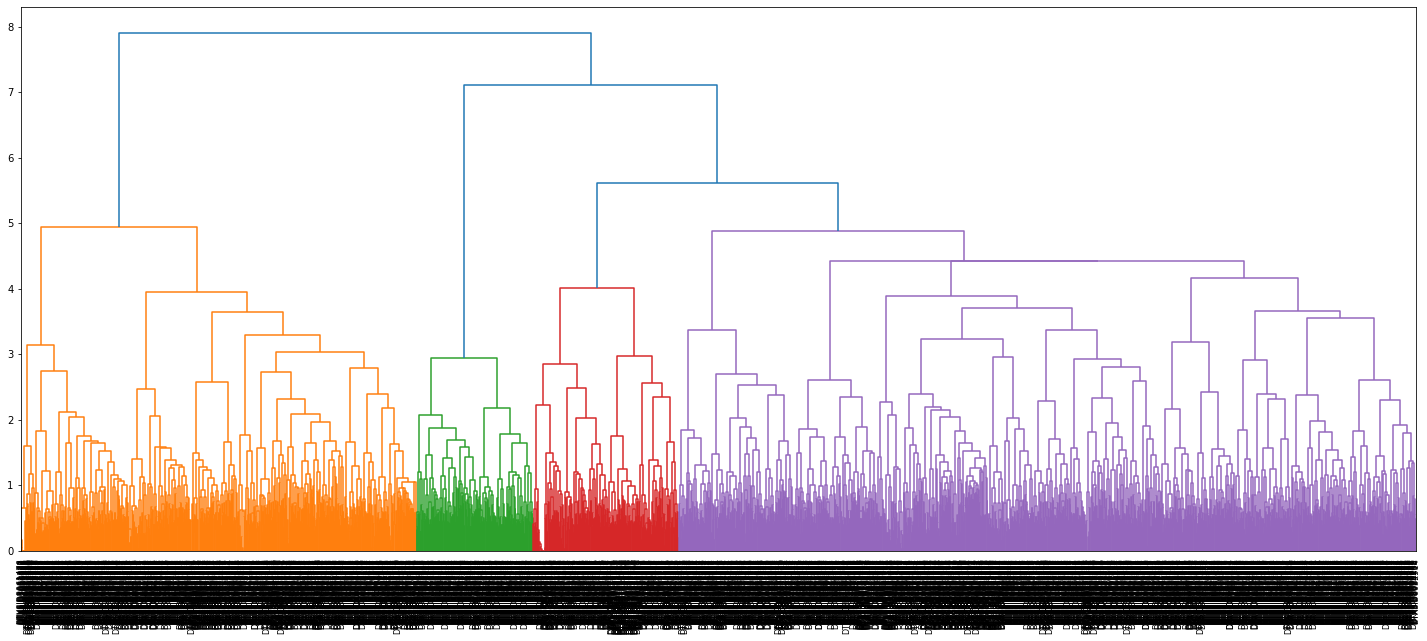

In [358]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[4]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Benzene and substituted derivatives'].index# font size for the x axis labels
)
plt.show()

In [359]:
max_d = 10
clusters_dist3 = fcluster(summaries[4]['Z'], max_d, criterion='maxclust')
clusters_dist3
dist_clusters3 = pd.DataFrame(list(zip(results['Benzene and substituted derivatives'].index, clusters_dist3)), columns = ['dtxsid', 'cluster_d'])
dist_clusters3['category'] = 'Benzene and substituted derivatives'

dist_clusters3 = dist_clusters3[['dtxsid', 'cluster_d',  'category']]

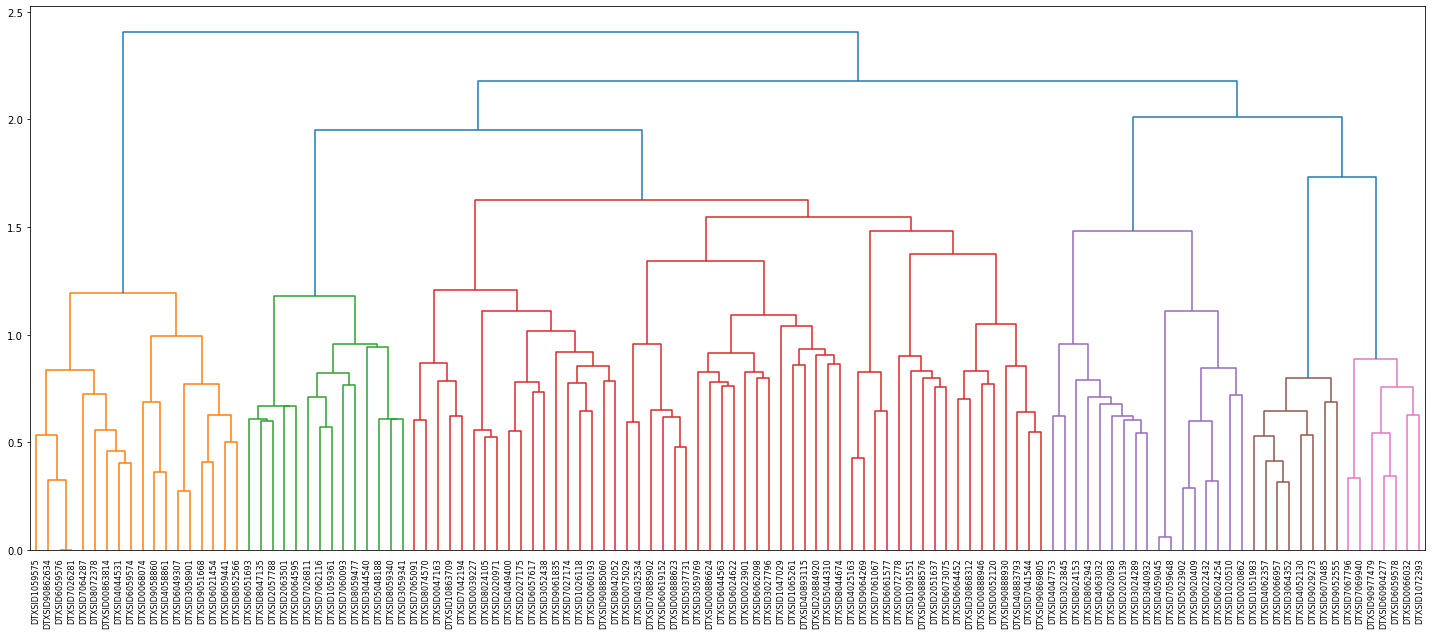

In [360]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[5]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Benzenoids'].index# font size for the x axis labels
)
plt.show()

In [361]:
max_d = 5
clusters_dist4 = fcluster(summaries[5]['Z'], max_d, criterion='maxclust')
clusters_dist4
dist_clusters4 = pd.DataFrame(list(zip(results['Benzenoids'].index, clusters_dist4)), columns = ['dtxsid', 'cluster_d'])
dist_clusters4['category'] = 'Benzenoids'

dist_clusters4 = dist_clusters4[['dtxsid', 'cluster_d',  'category']]

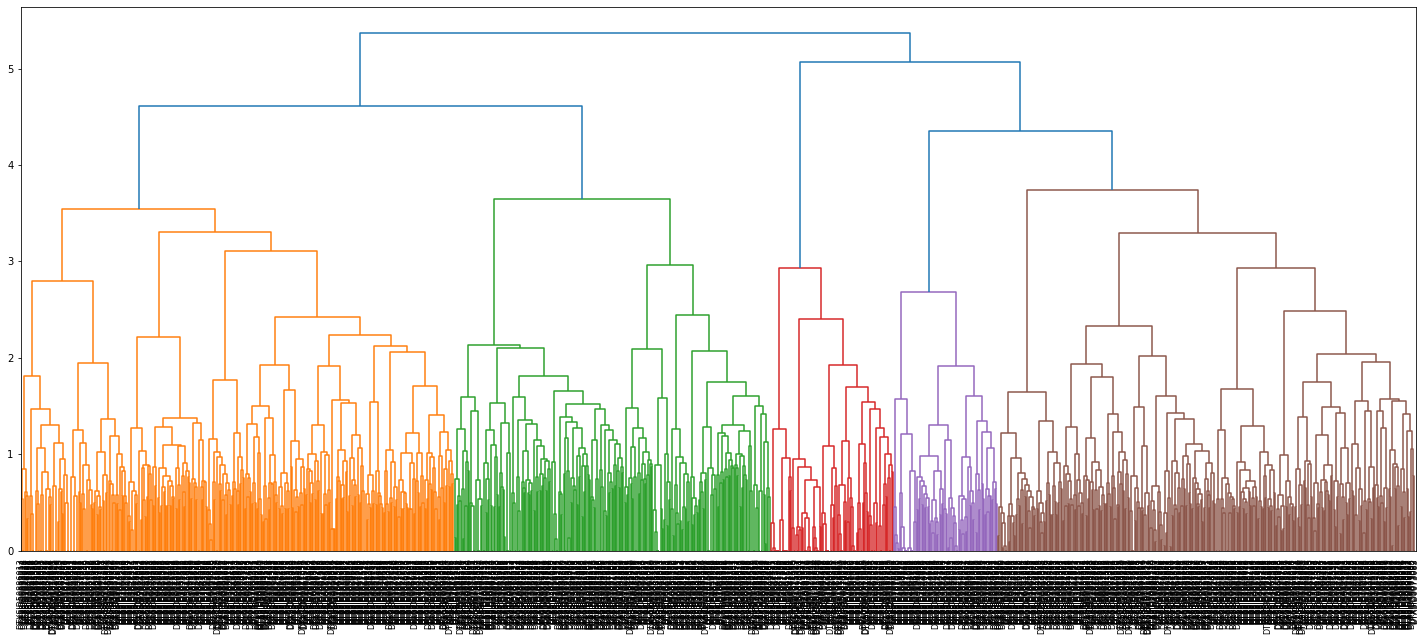

In [362]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[6]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Carboxylic acids and derivatives'].index# font size for the x axis labels
)
plt.show()

In [363]:
max_d = 5
clusters_dist5 = fcluster(summaries[6]['Z'], max_d, criterion='maxclust')
clusters_dist5
dist_clusters5 = pd.DataFrame(list(zip(results['Carboxylic acids and derivatives'].index, clusters_dist5)), columns = ['dtxsid', 'cluster_d'])
dist_clusters5['category'] = 'Carboxylic acids and derivatives'

dist_clusters5 = dist_clusters5[['dtxsid', 'cluster_d',  'category']]



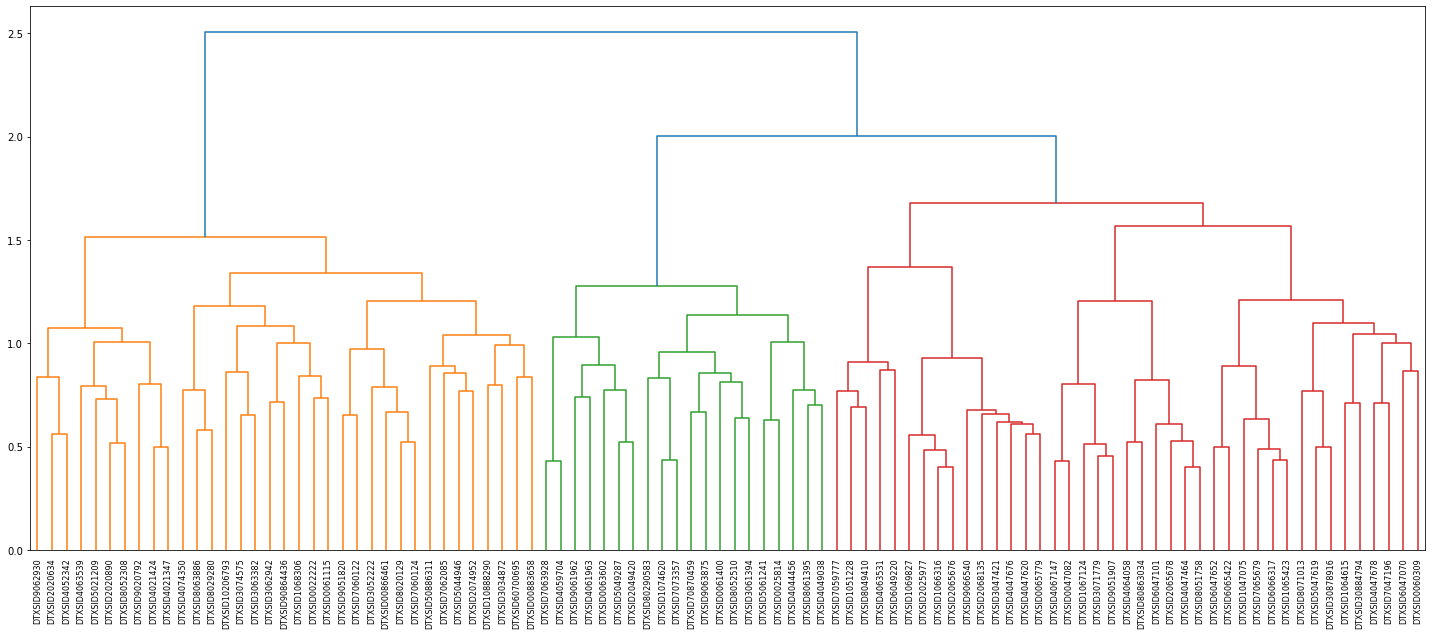

In [364]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[7]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Diazines'].index# font size for the x axis labels
)
plt.show()

In [365]:
max_d = 3
clusters_dist6 = fcluster(summaries[7]['Z'], max_d, criterion='maxclust')
clusters_dist6
dist_clusters6 = pd.DataFrame(list(zip(results['Diazines'].index, clusters_dist6)), columns = ['dtxsid', 'cluster_d'])
dist_clusters6['category'] = 'Diazines'

dist_clusters6 = dist_clusters6[['dtxsid', 'cluster_d',  'category']]


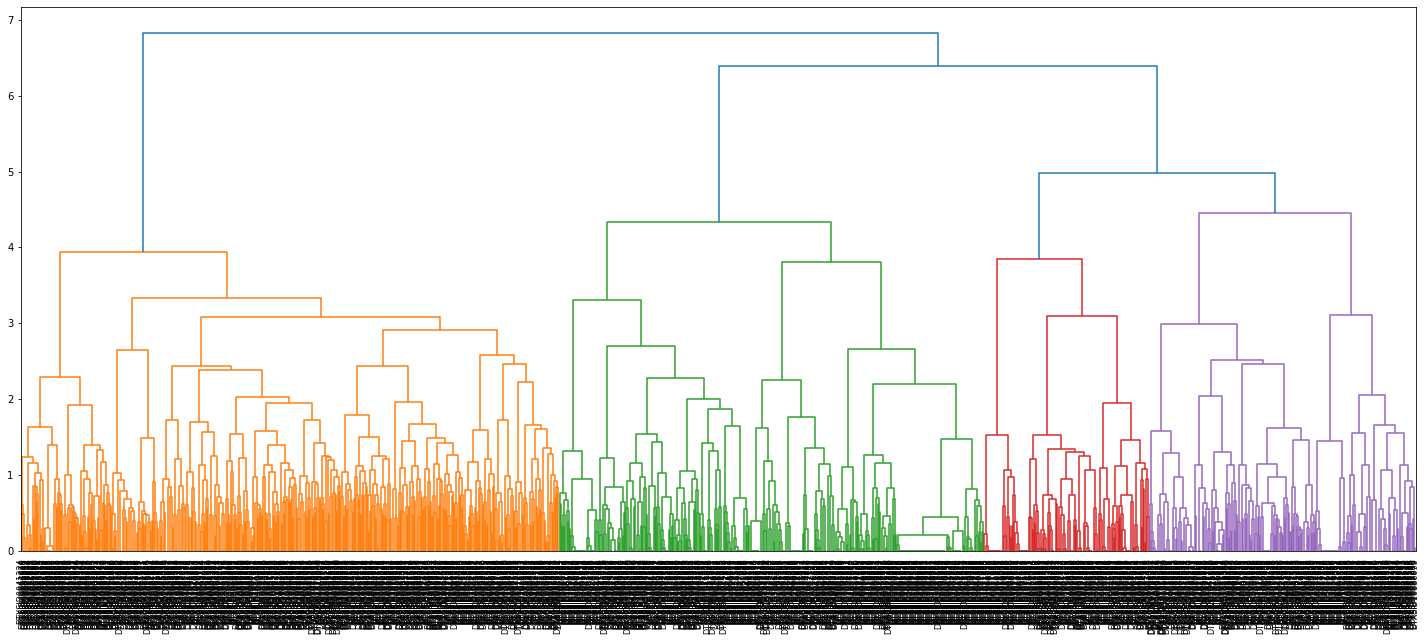

In [366]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[8]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Fatty Acyls'].index# font size for the x axis labels
)
plt.show()

In [367]:
max_d = 6
clusters_dist7 = fcluster(summaries[8]['Z'], max_d, criterion='maxclust')
clusters_dist7
dist_clusters7 = pd.DataFrame(list(zip(results['Fatty Acyls'].index, clusters_dist7)), columns = ['dtxsid', 'cluster_d'])
dist_clusters7['category'] = 'Fatty Acyls'

dist_clusters7 = dist_clusters7[['dtxsid', 'cluster_d',  'category']]


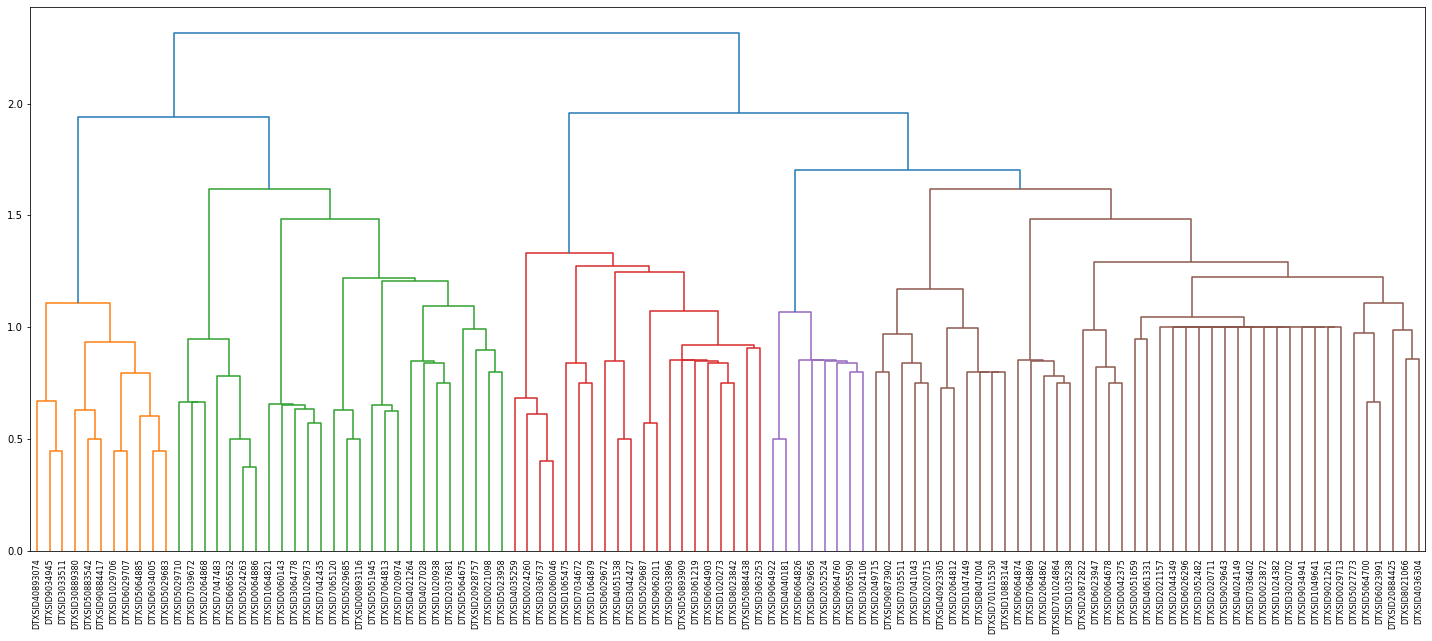

In [368]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[9]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Homogeneous non-metal compounds'].index# font size for the x axis labels
)
plt.show()

In [369]:
max_d = 4
clusters_dist8 = fcluster(summaries[9]['Z'], max_d, criterion='maxclust')
clusters_dist8
dist_clusters8 = pd.DataFrame(list(zip(results['Homogeneous non-metal compounds'].index, clusters_dist8)), columns = ['dtxsid', 'cluster_d'])
dist_clusters8['category'] = 'Homogeneous non-metal compounds'

dist_clusters8 = dist_clusters8[['dtxsid', 'cluster_d',  'category']]


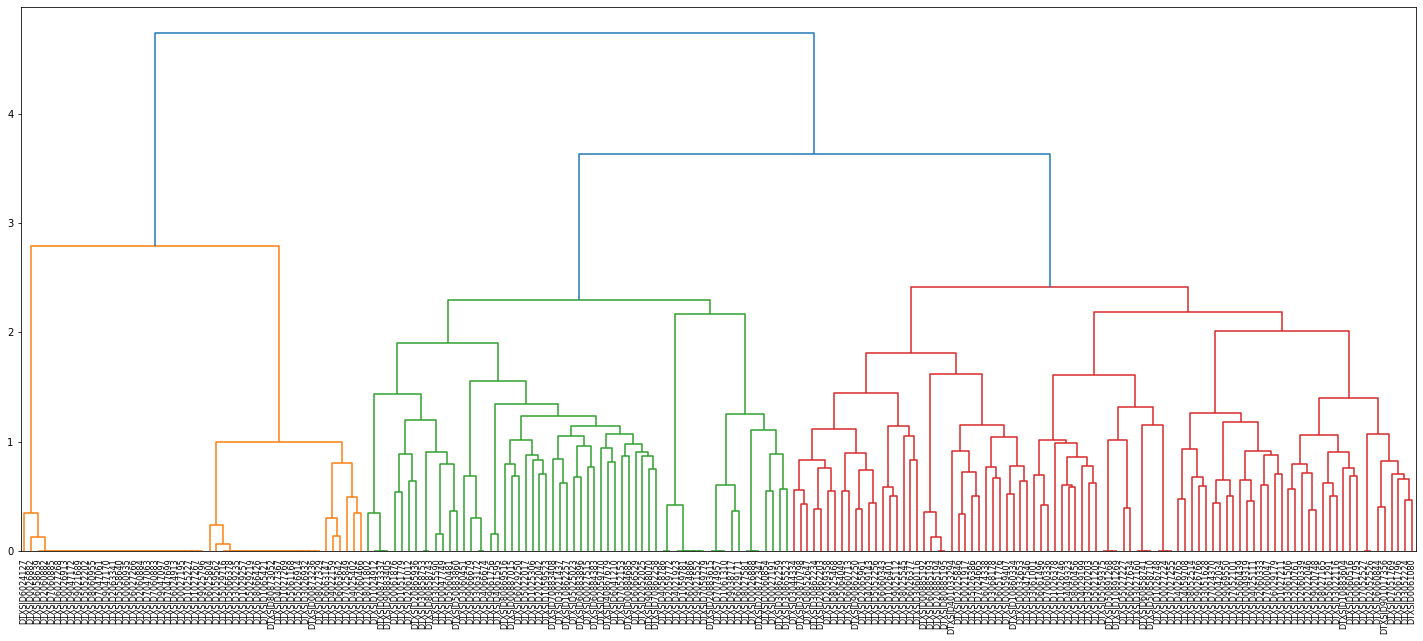

In [370]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[10]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Hydrocarbons'].index# font size for the x axis labels
)
plt.show()

In [371]:
max_d = 3
clusters_dist9 = fcluster(summaries[10]['Z'], max_d, criterion='maxclust')
clusters_dist9
dist_clusters9 = pd.DataFrame(list(zip(results['Hydrocarbons'].index, clusters_dist9)), columns = ['dtxsid', 'cluster_d'])
dist_clusters9['category'] = 'Hydrocarbons'

dist_clusters9 = dist_clusters9[['dtxsid', 'cluster_d',  'category']]

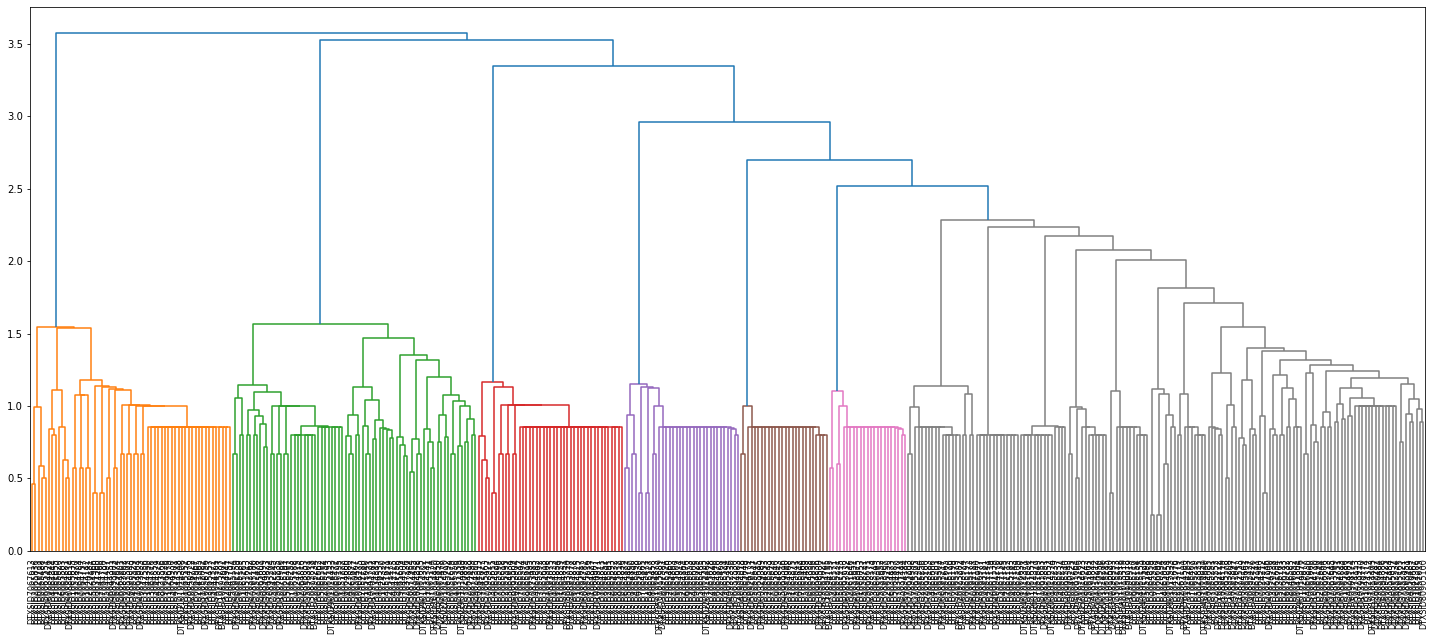

In [372]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[11]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Mixed metal/non-metal compounds'].index# font size for the x axis labels
)
plt.show()


In [373]:
max_d = 5
clusters_dist10 = fcluster(summaries[11]['Z'], max_d, criterion='maxclust')
clusters_dist10
dist_clusters10 = pd.DataFrame(list(zip(results['Mixed metal/non-metal compounds'].index, clusters_dist10)), columns = ['dtxsid', 'cluster_d'])
dist_clusters10['category'] = 'Mixed metal/non-metal compounds'

dist_clusters10 = dist_clusters10[['dtxsid', 'cluster_d',  'category']]

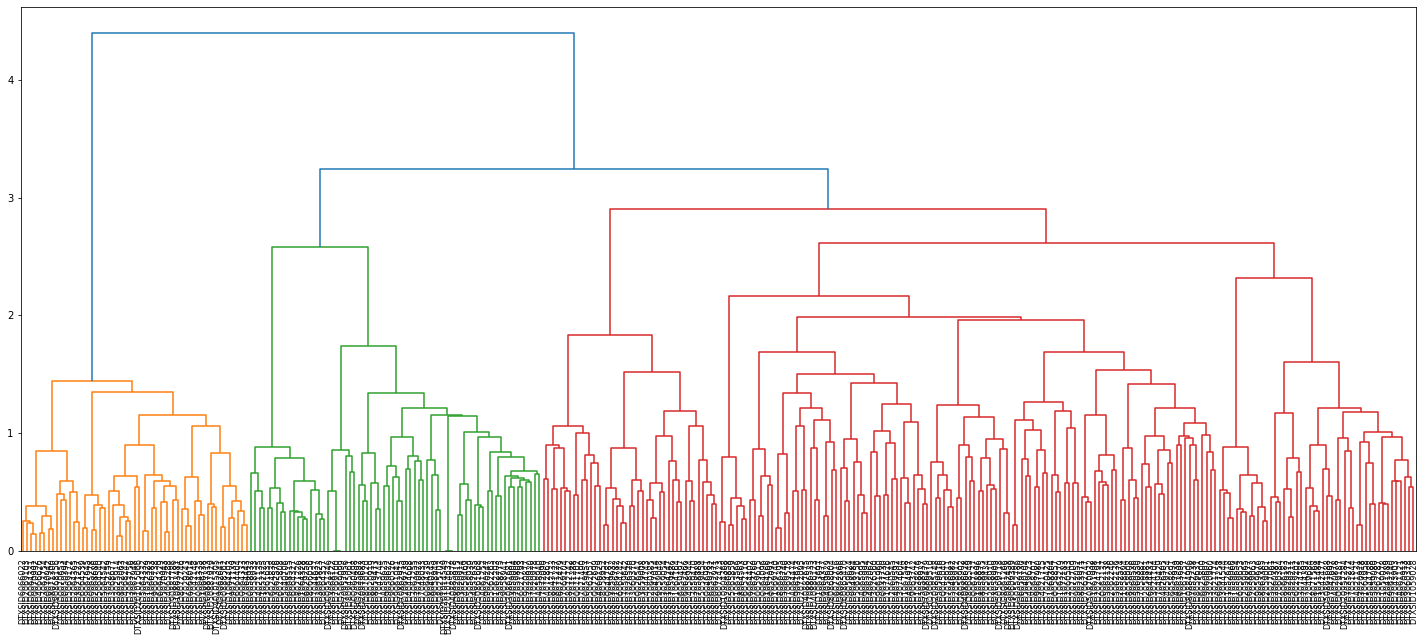

In [374]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[12]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Naphthalenes'].index# font size for the x axis labels
)
plt.show()

In [375]:
max_d = 5
clusters_dist11 = fcluster(summaries[12]['Z'], max_d, criterion='maxclust')
clusters_dist11
dist_clusters11 = pd.DataFrame(list(zip(results['Naphthalenes'].index, clusters_dist11)), columns = ['dtxsid', 'cluster_d'])
dist_clusters11['category'] = 'Naphthalenes'

dist_clusters11 = dist_clusters11[['dtxsid', 'cluster_d',  'category']]


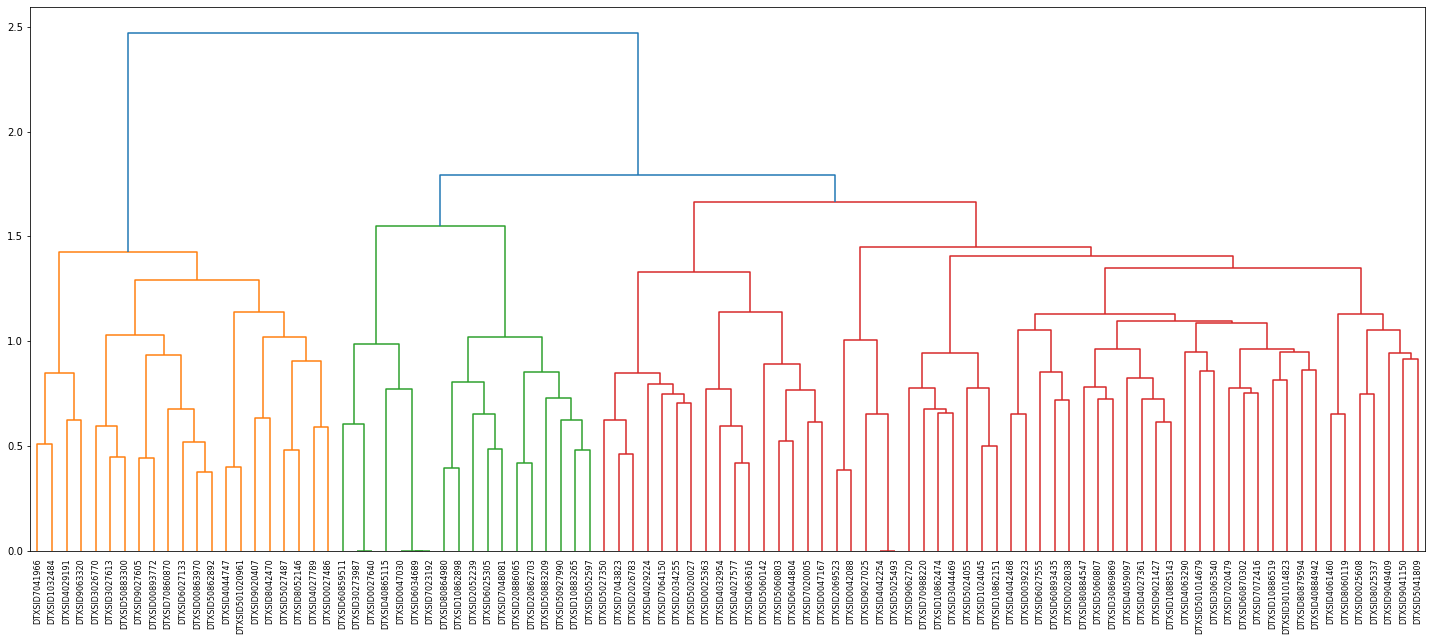

In [376]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[13]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organic acids and derivatives'].index# font size for the x axis labels
)
plt.show()

In [377]:
max_d = 3
clusters_dist12 = fcluster(summaries[13]['Z'], max_d, criterion='maxclust')
clusters_dist12
dist_clusters12 = pd.DataFrame(list(zip(results['Organic acids and derivatives'].index, clusters_dist12)), columns = ['dtxsid', 'cluster_d'])
dist_clusters12['category'] = 'Organic acids and derivatives'

dist_clusters12 = dist_clusters12[['dtxsid', 'cluster_d',  'category']]


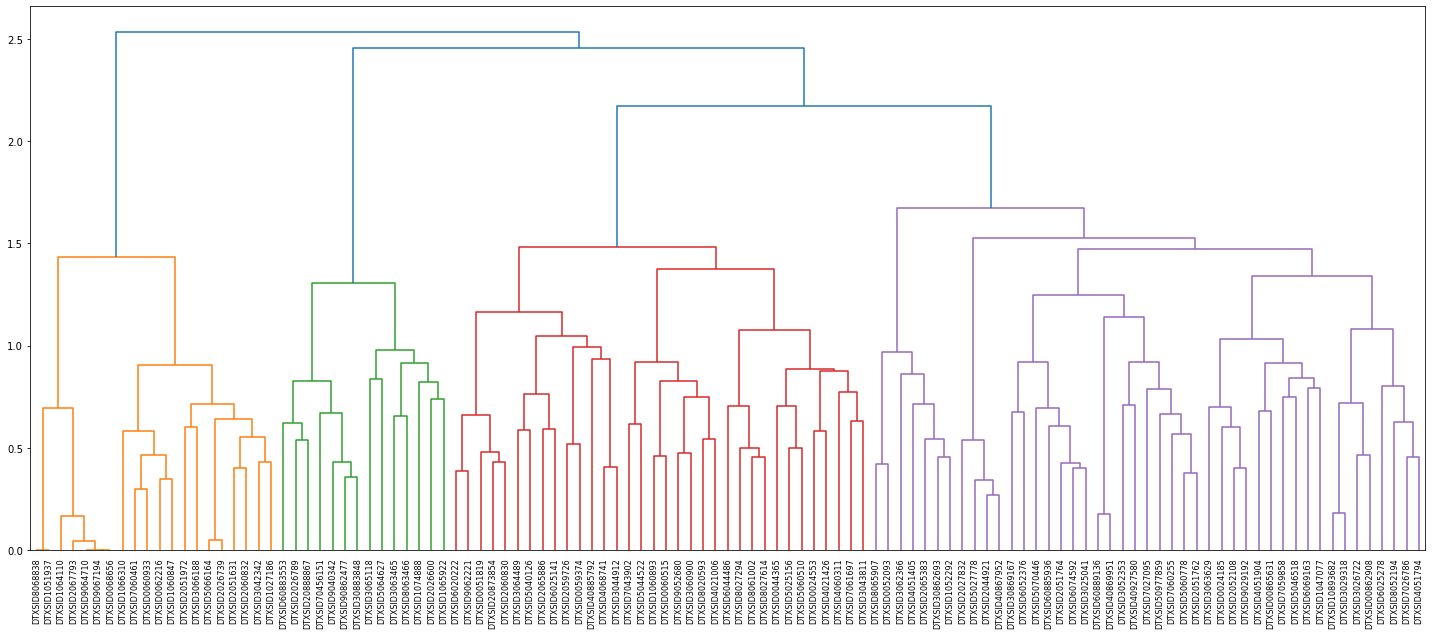

In [378]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[14]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organic carbonic acids and derivatives'].index# font size for the x axis labels
)
plt.show()

In [379]:
max_d = 4
clusters_dist13 = fcluster(summaries[14]['Z'], max_d, criterion='maxclust')
clusters_dist13
dist_clusters13 = pd.DataFrame(list(zip(results['Organic carbonic acids and derivatives'].index, clusters_dist13)), columns = ['dtxsid', 'cluster_d'])
dist_clusters13['category'] = 'Organic carbonic acids and derivatives'

dist_clusters11 = dist_clusters11[['dtxsid', 'cluster_d',  'category']]


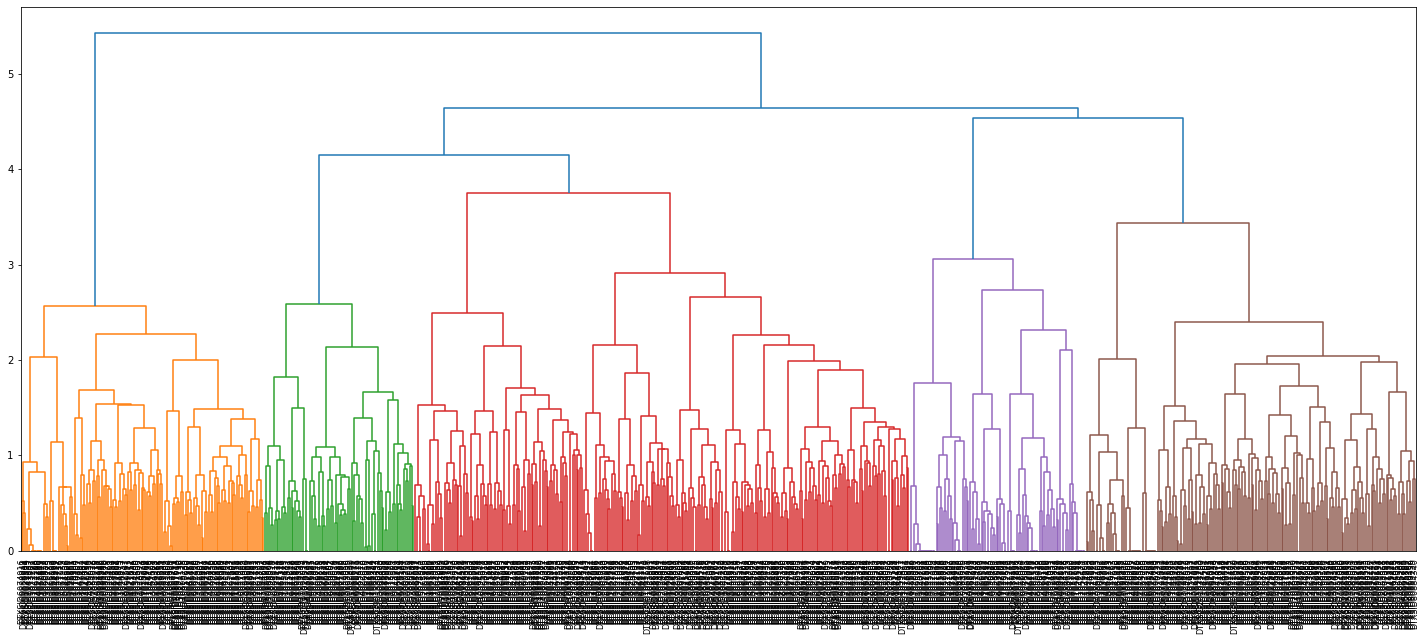

In [380]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[15]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organic nitrogen compounds'].index# font size for the x axis labels
)
plt.show()

In [381]:
max_d = 6
clusters_dist14 = fcluster(summaries[15]['Z'], max_d, criterion='maxclust')
clusters_dist14
dist_clusters14 = pd.DataFrame(list(zip(results['Organic nitrogen compounds'].index, clusters_dist14)), columns = ['dtxsid', 'cluster_d'])
dist_clusters14['category'] = 'Organic nitrogen compounds'

dist_clusters14 = dist_clusters14[['dtxsid', 'cluster_d',  'category']]


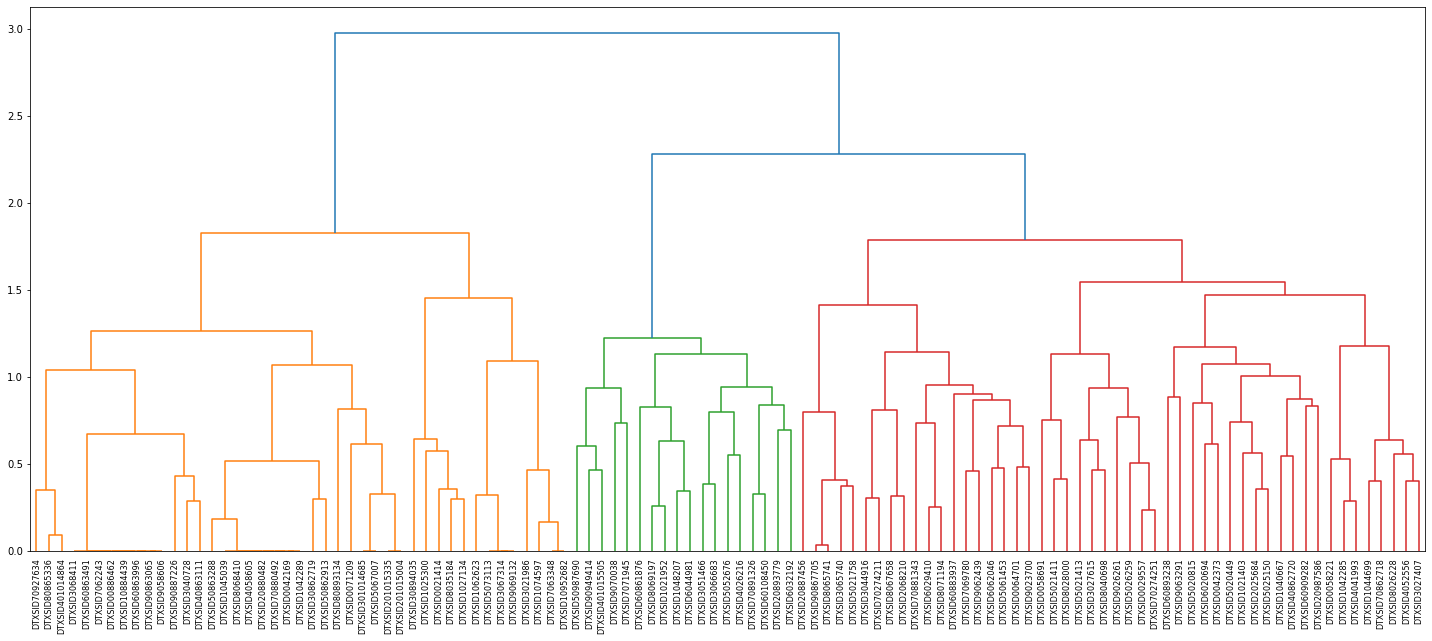

In [382]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[16]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organic phosphoric acids and derivatives'].index# font size for the x axis labels
)
plt.show()

In [383]:
max_d = 3
clusters_dist15 = fcluster(summaries[16]['Z'], max_d, criterion='maxclust')
clusters_dist15
dist_clusters15 = pd.DataFrame(list(zip(results['Organic phosphoric acids and derivatives'].index, clusters_dist15)), columns = ['dtxsid', 'cluster_d'])
dist_clusters15['category'] = 'Organic phosphoric acids and derivatives'

dist_clusters15 = dist_clusters15[['dtxsid', 'cluster_d',  'category']]


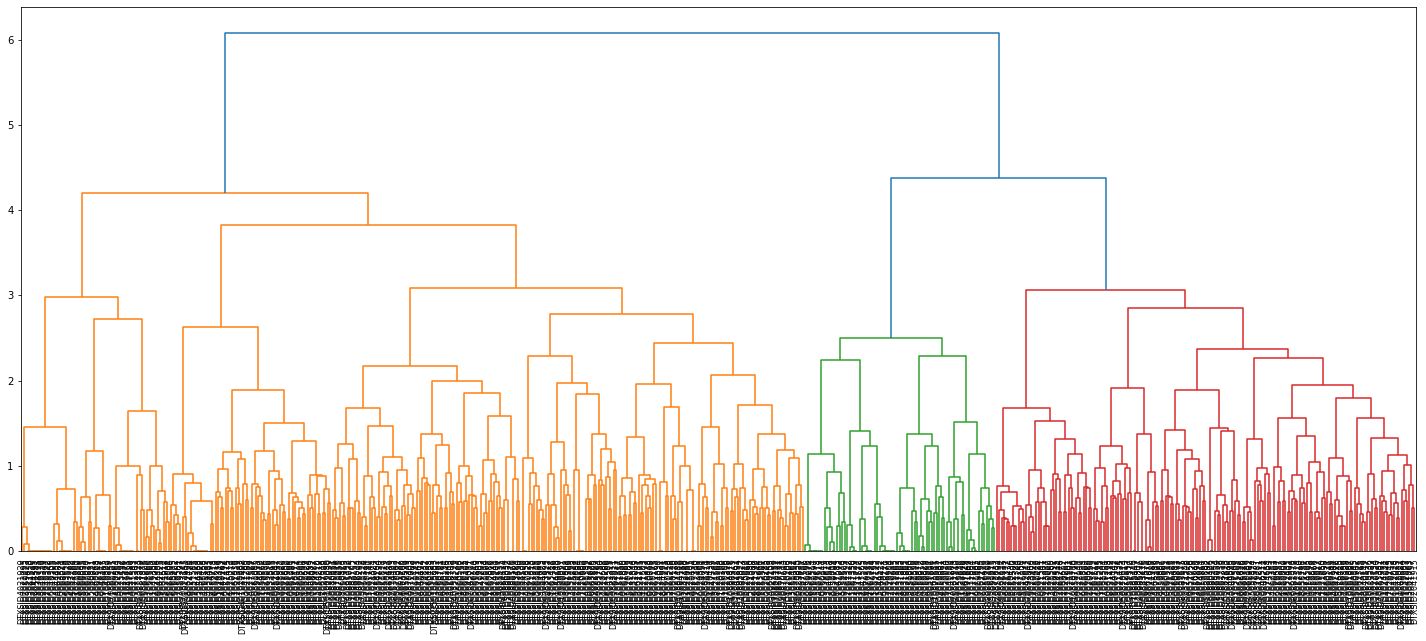

In [384]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[17]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organohalogen compounds'].index# font size for the x axis labels
)
plt.show()

In [385]:
max_d = 4
clusters_dist16 = fcluster(summaries[17]['Z'], max_d, criterion='maxclust')
clusters_dist16
dist_clusters16 = pd.DataFrame(list(zip(results['Organohalogen compounds'].index, clusters_dist16)), columns = ['dtxsid', 'cluster_d'])
dist_clusters16['category'] = 'Organohalogen compounds'

dist_clusters16 = dist_clusters16[['dtxsid', 'cluster_d',  'category']]


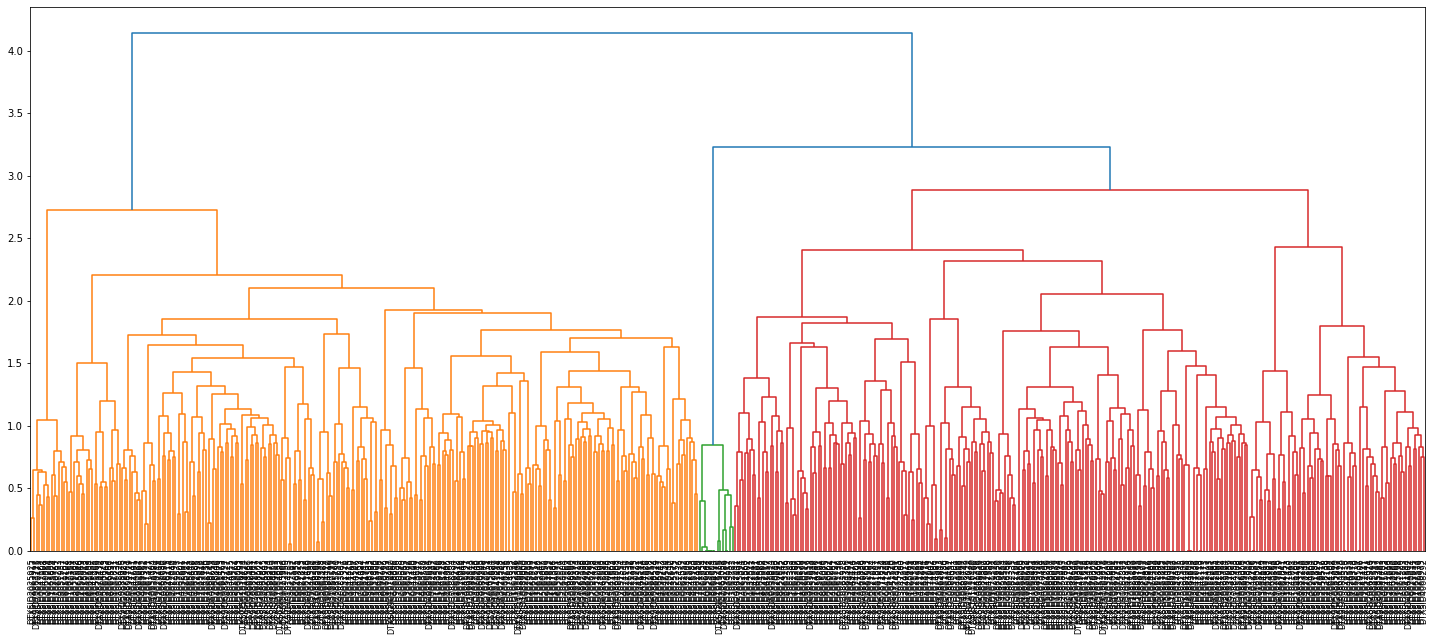

In [386]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[18]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organoheterocyclic compounds'].index# font size for the x axis labels
)
plt.show()

In [387]:
max_d = 3
clusters_dist17 = fcluster(summaries[18]['Z'], max_d, criterion='maxclust')
clusters_dist17
dist_clusters17 = pd.DataFrame(list(zip(results['Organoheterocyclic compounds'].index, clusters_dist17)), columns = ['dtxsid', 'cluster_d'])
dist_clusters17['category'] = 'Organoheterocyclic compounds'

dist_clusters17 = dist_clusters17[['dtxsid', 'cluster_d',  'category']]


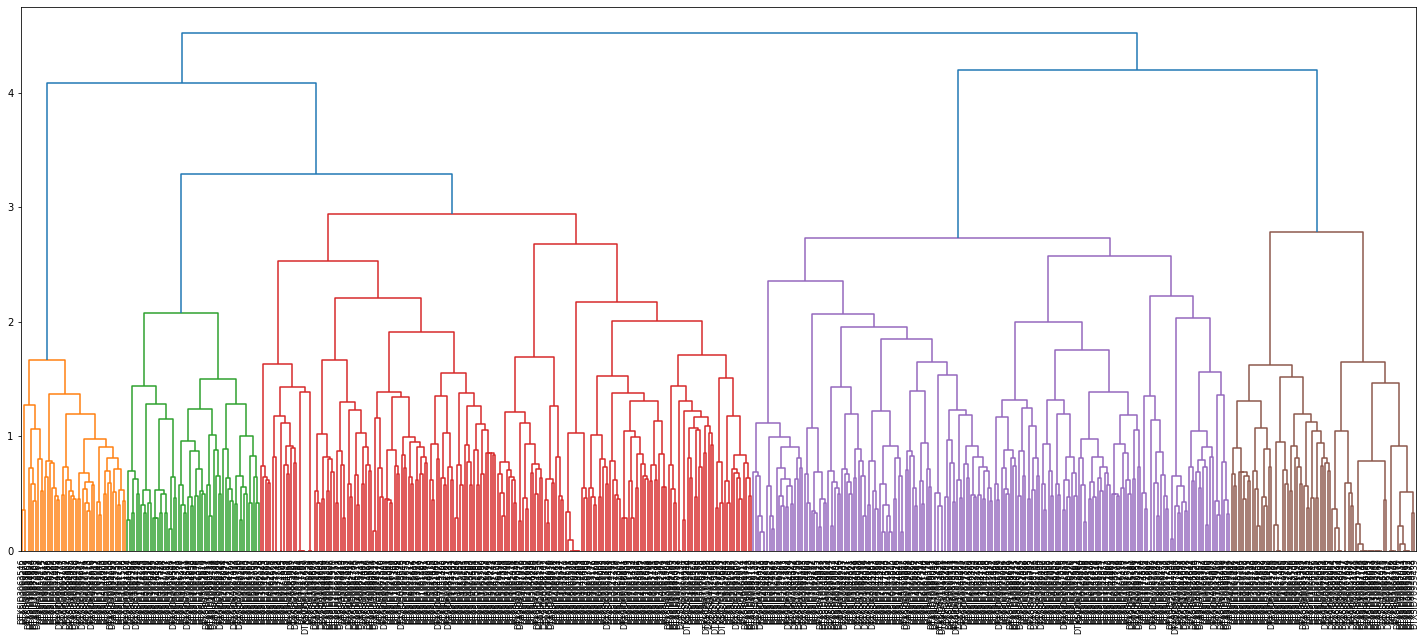

In [388]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[19]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organometallic compounds'].index# font size for the x axis labels
)
plt.show()

In [389]:
max_d = 4
clusters_dist18 = fcluster(summaries[19]['Z'], max_d, criterion='maxclust')
clusters_dist18
dist_clusters18 = pd.DataFrame(list(zip(results['Organometallic compounds'].index, clusters_dist18)), columns = ['dtxsid', 'cluster_d'])
dist_clusters18['category'] = 'Organometallic compounds'

dist_clusters18 = dist_clusters18[['dtxsid', 'cluster_d',  'category']]


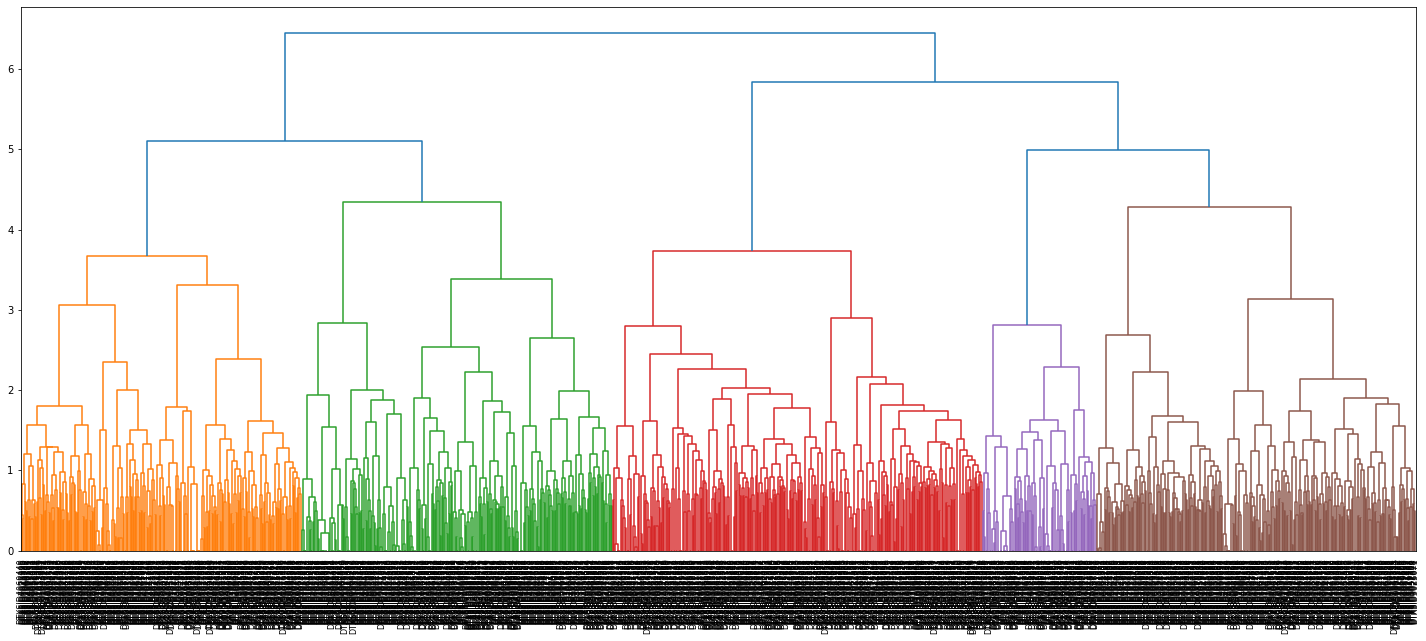

In [390]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[20]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organooxygen compounds'].index# font size for the x axis labels
)
plt.show()

In [391]:
max_d = 5
clusters_dist19 = fcluster(summaries[20]['Z'], max_d, criterion='maxclust')
clusters_dist19
dist_clusters19 = pd.DataFrame(list(zip(results['Organooxygen compounds'].index, clusters_dist19)), columns = ['dtxsid', 'cluster_d'])
dist_clusters19['category'] = 'Organooxygen compounds'

dist_clusters19 = dist_clusters19[['dtxsid', 'cluster_d',  'category']]


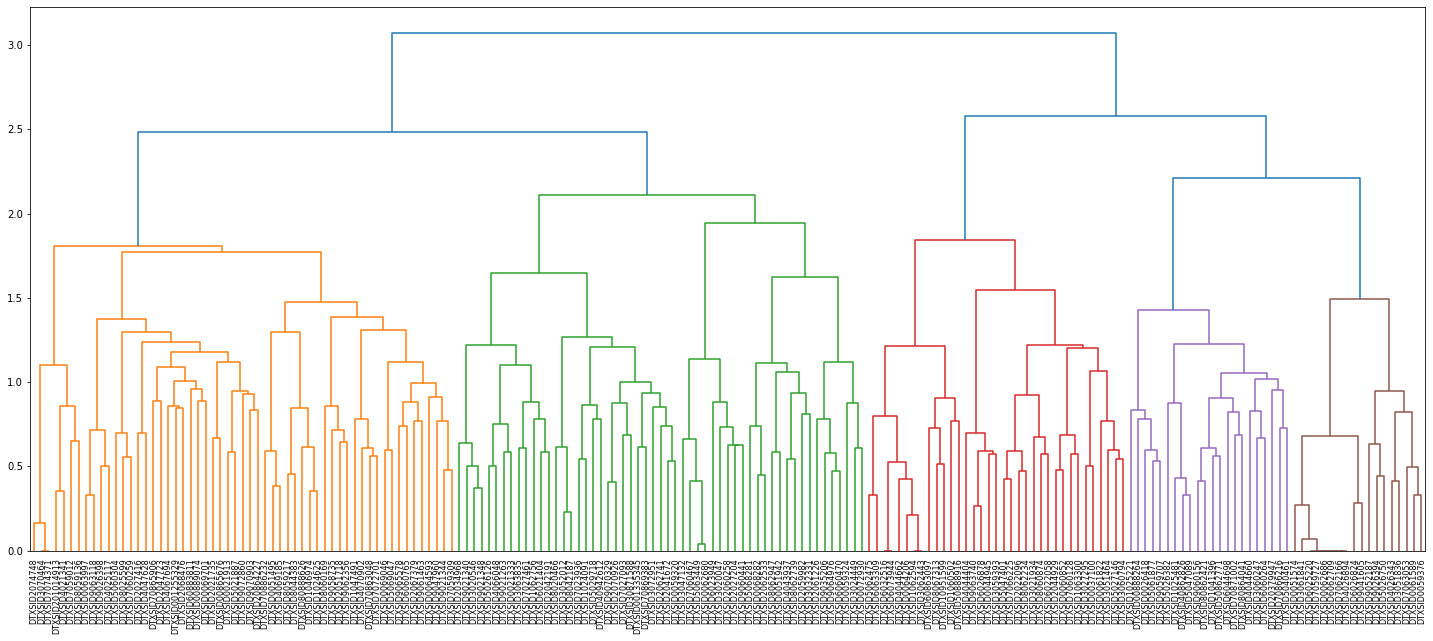

In [392]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[21]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Organosulfur compounds'].index# font size for the x axis labels
)
plt.show()

In [393]:
max_d = 4
clusters_dist20 = fcluster(summaries[21]['Z'], max_d, criterion='maxclust')
clusters_dist20
dist_clusters20 = pd.DataFrame(list(zip(results['Organosulfur compounds'].index, clusters_dist20)), columns = ['dtxsid', 'cluster_d'])
dist_clusters20['category'] = 'Organosulfur compounds'

dist_clusters20 = dist_clusters20[['dtxsid', 'cluster_d',  'category']]


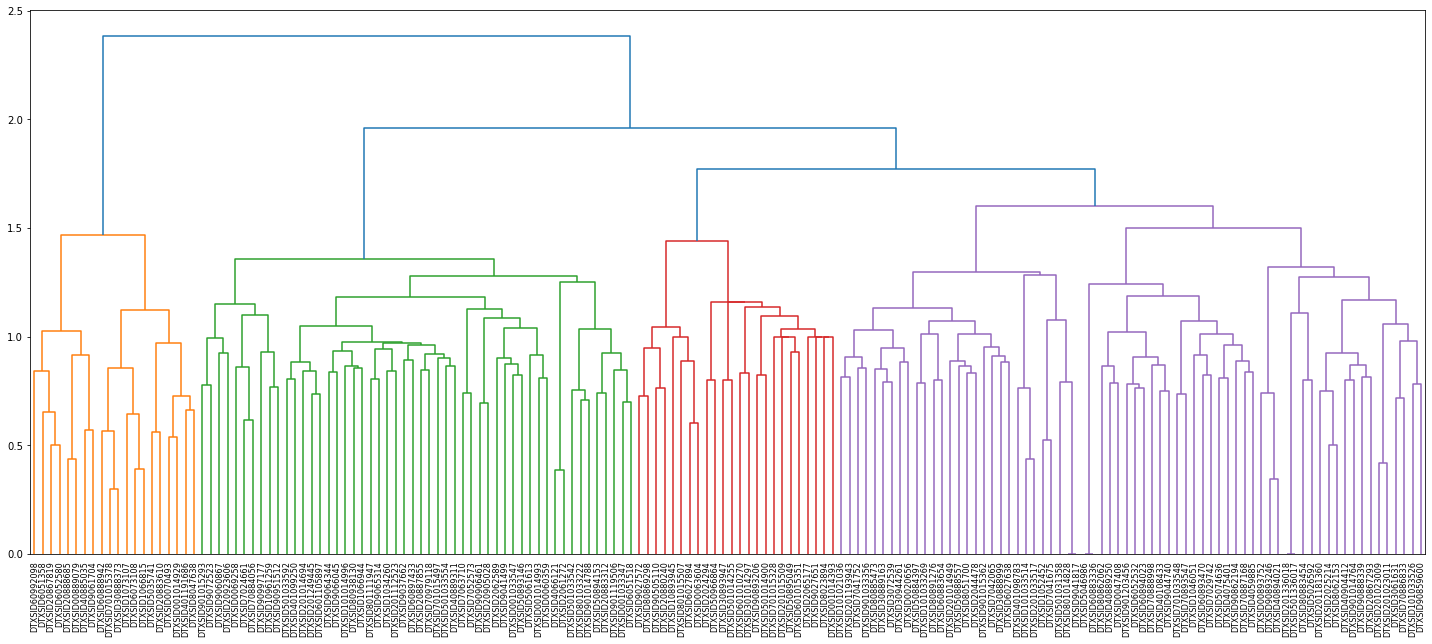

In [394]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[22]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Other'].index# font size for the x axis labels
)
plt.show()

In [395]:
max_d = 4
clusters_dist21 = fcluster(summaries[22]['Z'], max_d, criterion='maxclust')
clusters_dist21
dist_clusters21 = pd.DataFrame(list(zip(results['Other'].index, clusters_dist21)), columns = ['dtxsid', 'cluster_d'])
dist_clusters21['category'] = 'Other'

dist_clusters21 = dist_clusters21[['dtxsid', 'cluster_d',  'category']]


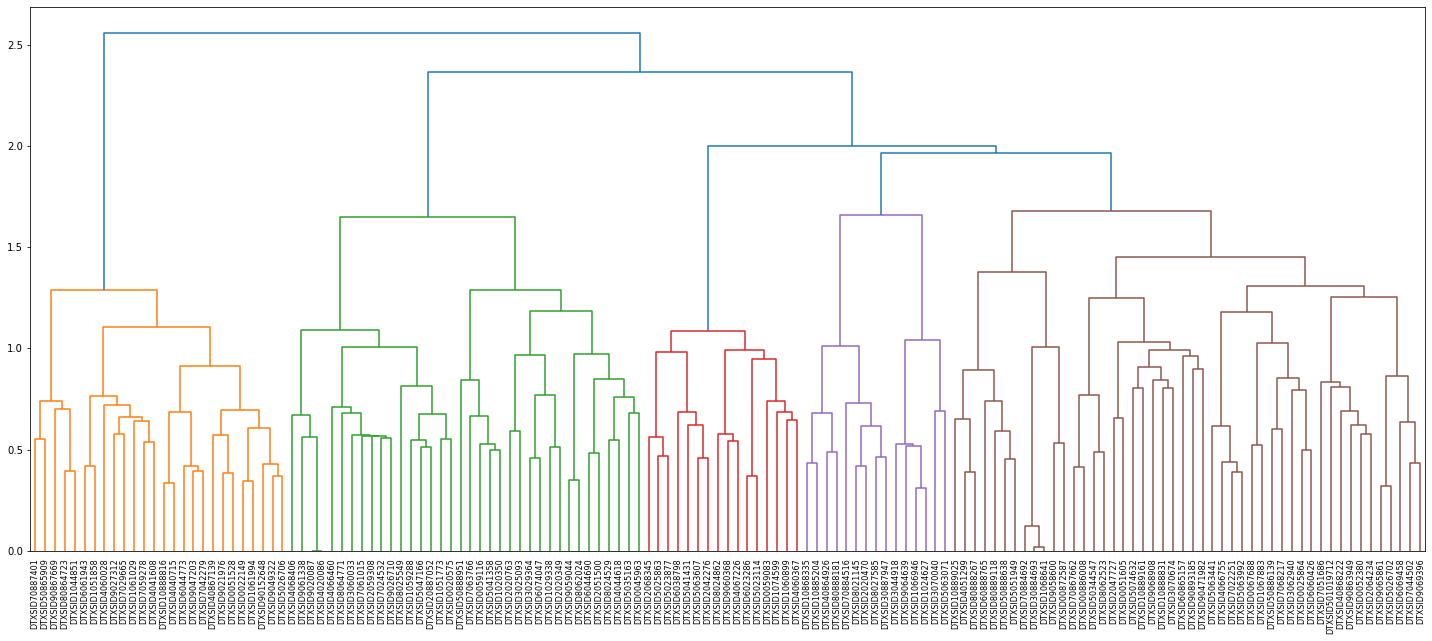

In [396]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[23]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Phenol ethers'].index# font size for the x axis labels
)
plt.show()

In [397]:
max_d = 5
clusters_dist22 = fcluster(summaries[23]['Z'], max_d, criterion='maxclust')
clusters_dist22
dist_clusters22 = pd.DataFrame(list(zip(results['Phenol ethers'].index, clusters_dist22)), columns = ['dtxsid', 'cluster_d'])
dist_clusters22['category'] = 'Phenol ethers'

dist_clusters22 = dist_clusters22[['dtxsid', 'cluster_d',  'category']]


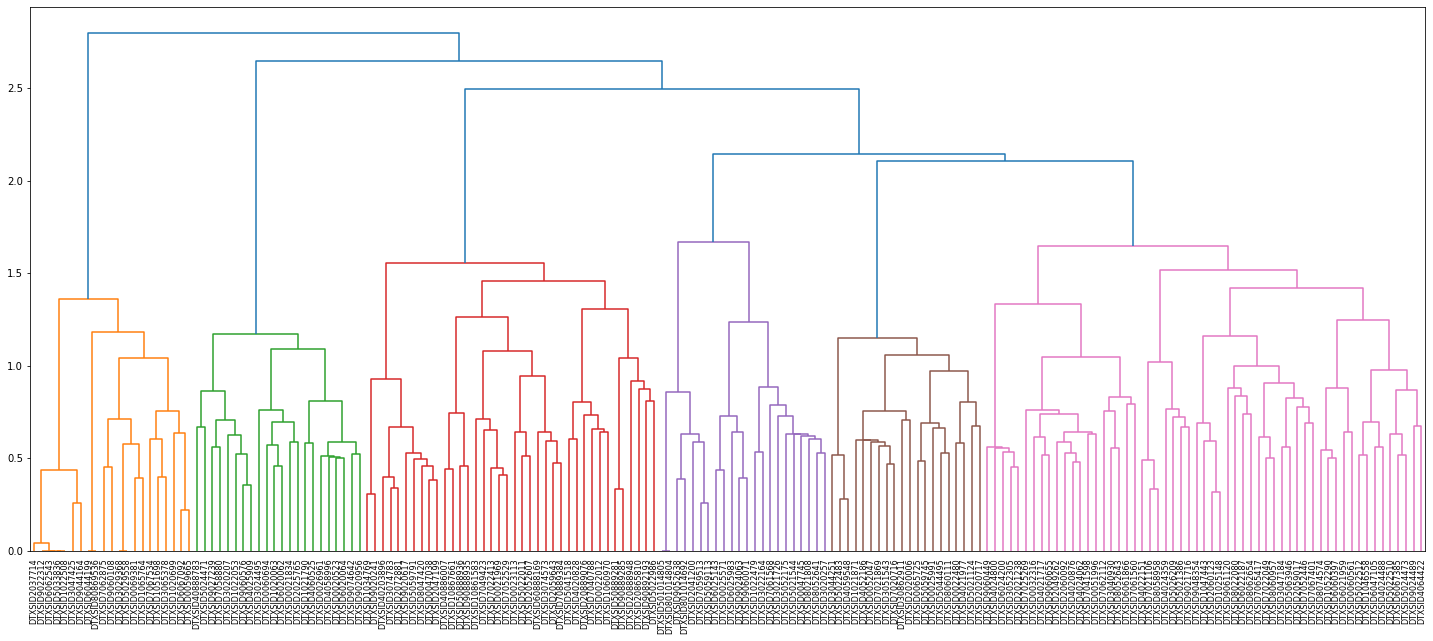

In [398]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[24]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Phenols'].index# font size for the x axis labels
)
plt.show()

In [399]:
max_d = 6
clusters_dist23 = fcluster(summaries[24]['Z'], max_d, criterion='maxclust')
clusters_dist23
dist_clusters23 = pd.DataFrame(list(zip(results['Phenols'].index, clusters_dist23)), columns = ['dtxsid', 'cluster_d'])
dist_clusters23['category'] = 'Phenols'

dist_clusters23 = dist_clusters23[['dtxsid', 'cluster_d',  'category']]


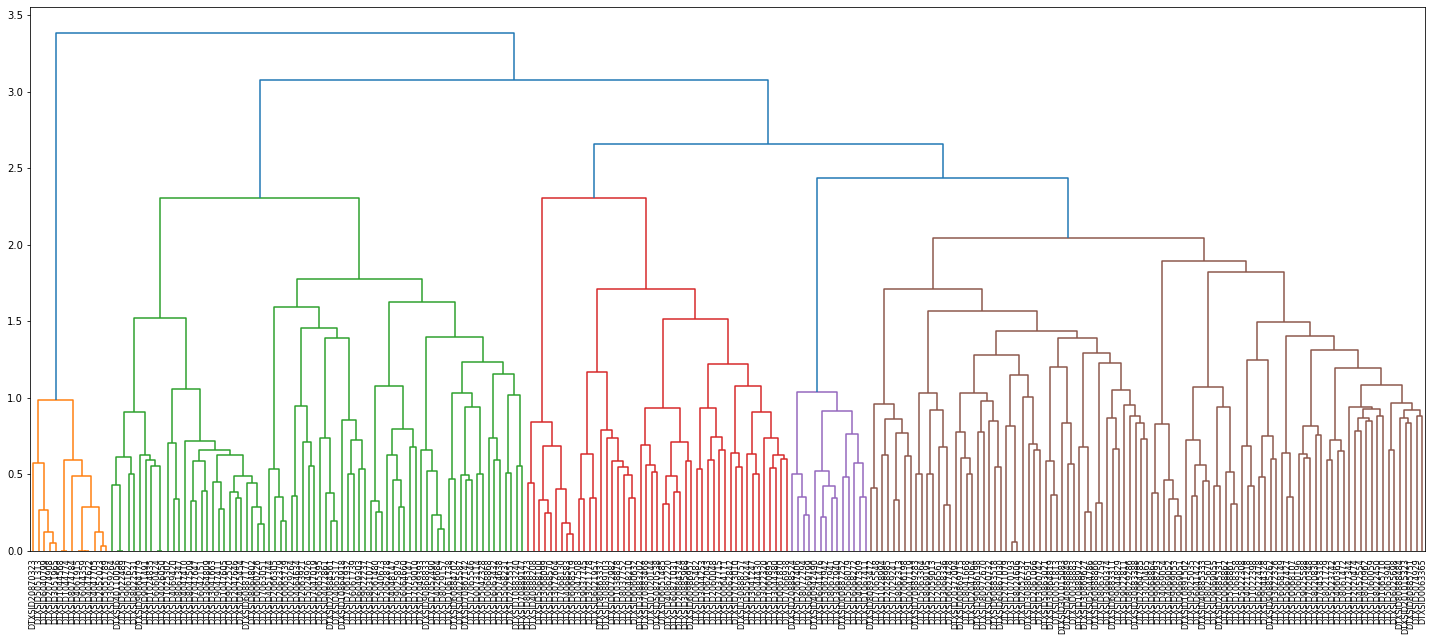

In [400]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[25]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Phenylpropanoids and polyketides'].index# font size for the x axis labels
)
plt.show()

In [401]:
max_d = 4
clusters_dist24 = fcluster(summaries[25]['Z'], max_d, criterion='maxclust')
clusters_dist24
dist_clusters24 = pd.DataFrame(list(zip(results['Phenylpropanoids and polyketides'].index, clusters_dist24)), columns = ['dtxsid', 'cluster_d'])
dist_clusters24['category'] = 'Phenylpropanoids and polyketides'

dist_clusters24 = dist_clusters24[['dtxsid', 'cluster_d',  'category']]


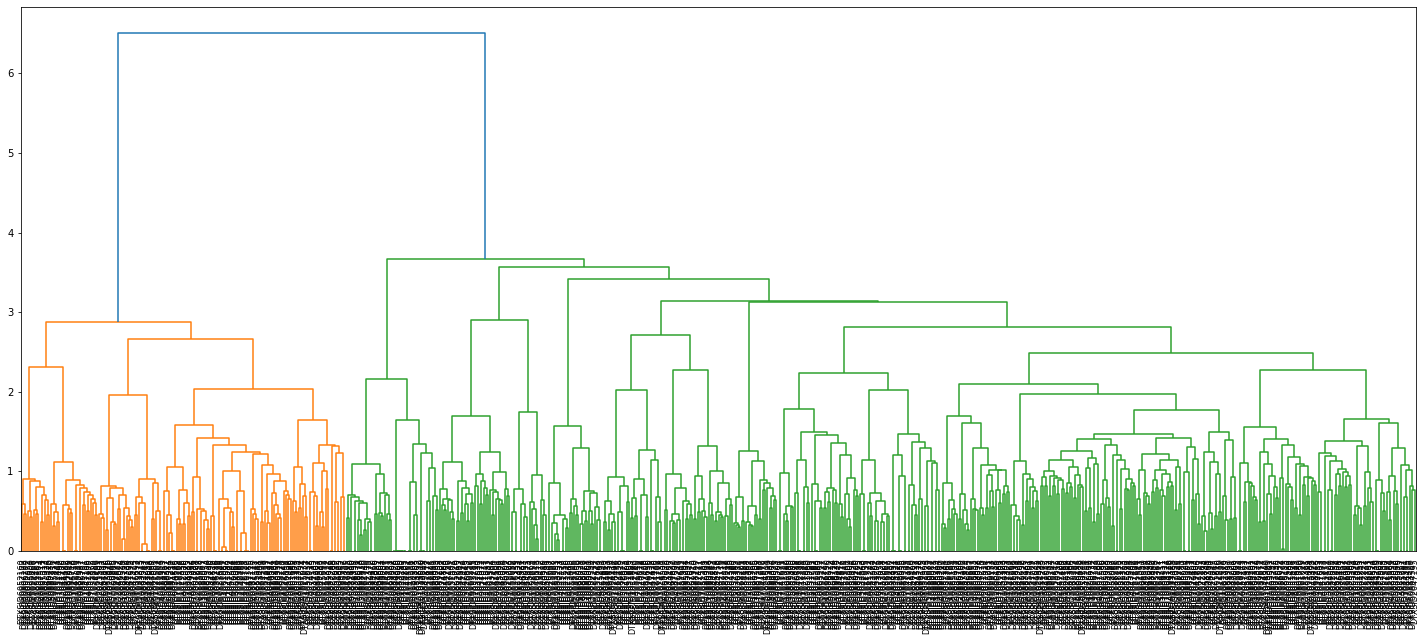

In [402]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[26]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Prenol lipids'].index# font size for the x axis labels
)
plt.show()

In [403]:
max_d = 2
clusters_dist25 = fcluster(summaries[26]['Z'], max_d, criterion='maxclust')
clusters_dist25
dist_clusters25 = pd.DataFrame(list(zip(results['Prenol lipids'].index, clusters_dist25)), columns = ['dtxsid', 'cluster_d'])
dist_clusters25['category'] = 'Prenol lipids'

dist_clusters25 = dist_clusters25[['dtxsid', 'cluster_d',  'category']]


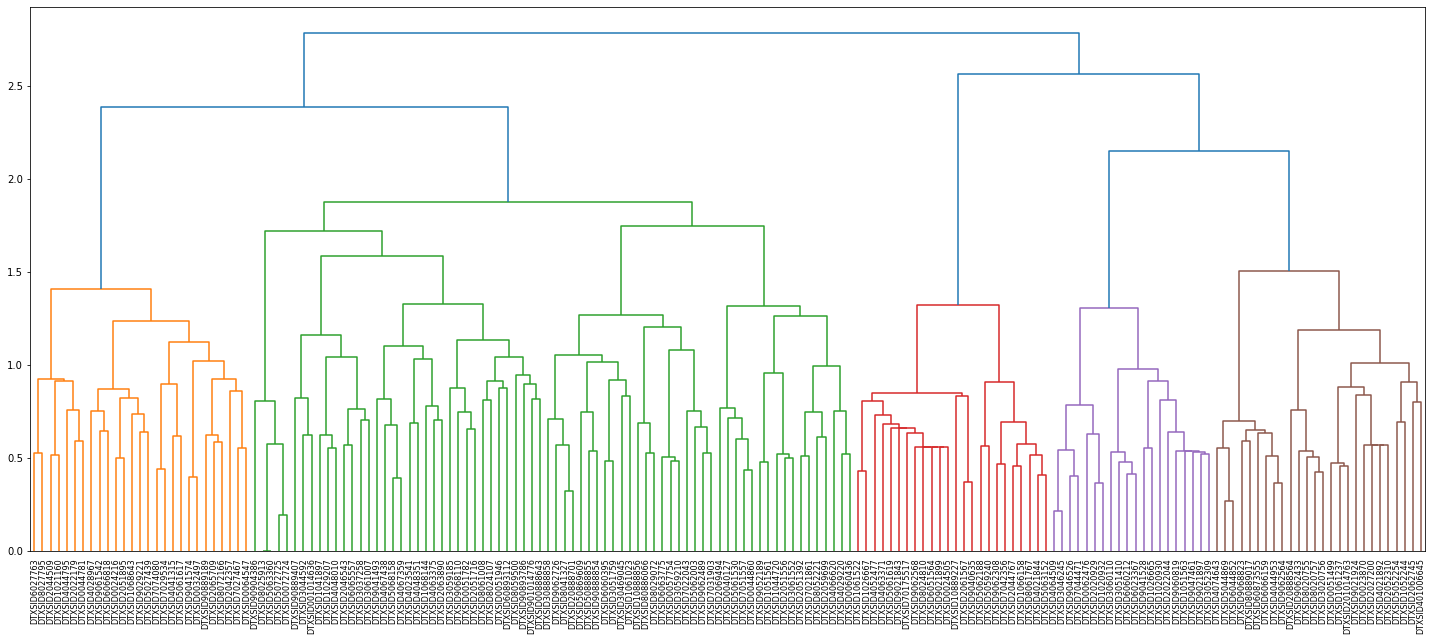

In [404]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[27]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Pyridines and derivatives'].index# font size for the x axis labels
)
plt.show()

In [405]:
max_d = 4
clusters_dist26 = fcluster(summaries[27]['Z'], max_d, criterion='maxclust')
clusters_dist26
dist_clusters26 = pd.DataFrame(list(zip(results['Pyridines and derivatives'].index, clusters_dist26)), columns = ['dtxsid', 'cluster_d'])
dist_clusters26['category'] = 'Pyridines and derivatives'

dist_clusters26 = dist_clusters26[['dtxsid', 'cluster_d',  'category']]


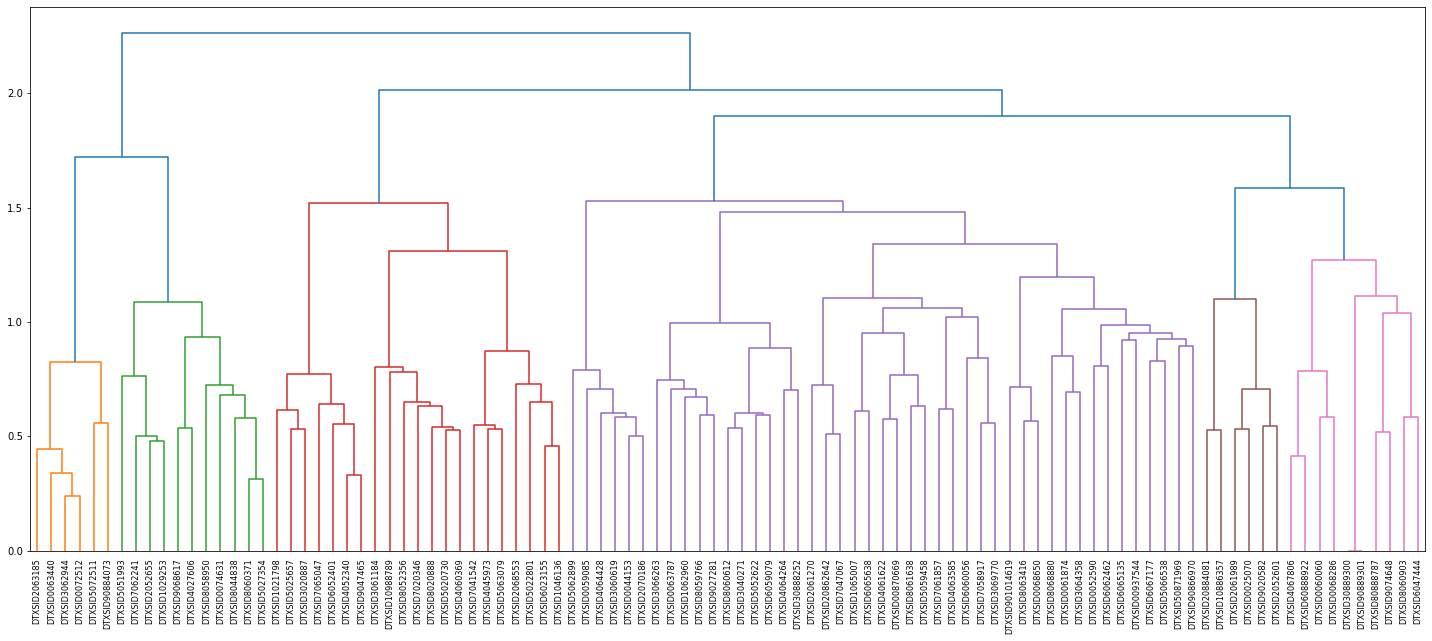

In [406]:
plt.figure(figsize=(25, 10))
dendrogram(
    summaries[28]['Z'],
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = results['Quinolines and derivatives'].index# font size for the x axis labels
)
plt.show()

In [407]:
max_d = 5
clusters_dist27 = fcluster(summaries[28]['Z'], max_d, criterion='maxclust')
clusters_dist27
dist_clusters27 = pd.DataFrame(list(zip(results['Quinolines and derivatives'].index, clusters_dist27)), columns = ['dtxsid', 'cluster_d'])
dist_clusters27['category'] = 'Quinolines and derivatives'

dist_clusters27 = dist_clusters27[['dtxsid', 'cluster_d',  'category']]


In [408]:
subcategory_df = pd.concat([dist_clusters, dist_clusters1,dist_clusters2,dist_clusters3,dist_clusters4,dist_clusters5,dist_clusters6, \
                            dist_clusters7, dist_clusters8,dist_clusters9,dist_clusters10,dist_clusters11,dist_clusters12,dist_clusters13, \
                            dist_clusters14, dist_clusters15,dist_clusters16,dist_clusters17,dist_clusters18,dist_clusters19,dist_clusters20, \
                            dist_clusters21, dist_clusters22,dist_clusters23,dist_clusters24,dist_clusters25,dist_clusters26,dist_clusters27, dist_clusters28])

In [409]:
subcategory_df.category.nunique()

29

In [426]:
subcategory_df.shape

(12771, 3)

<AxesSubplot:xlabel='category,cluster_d'>

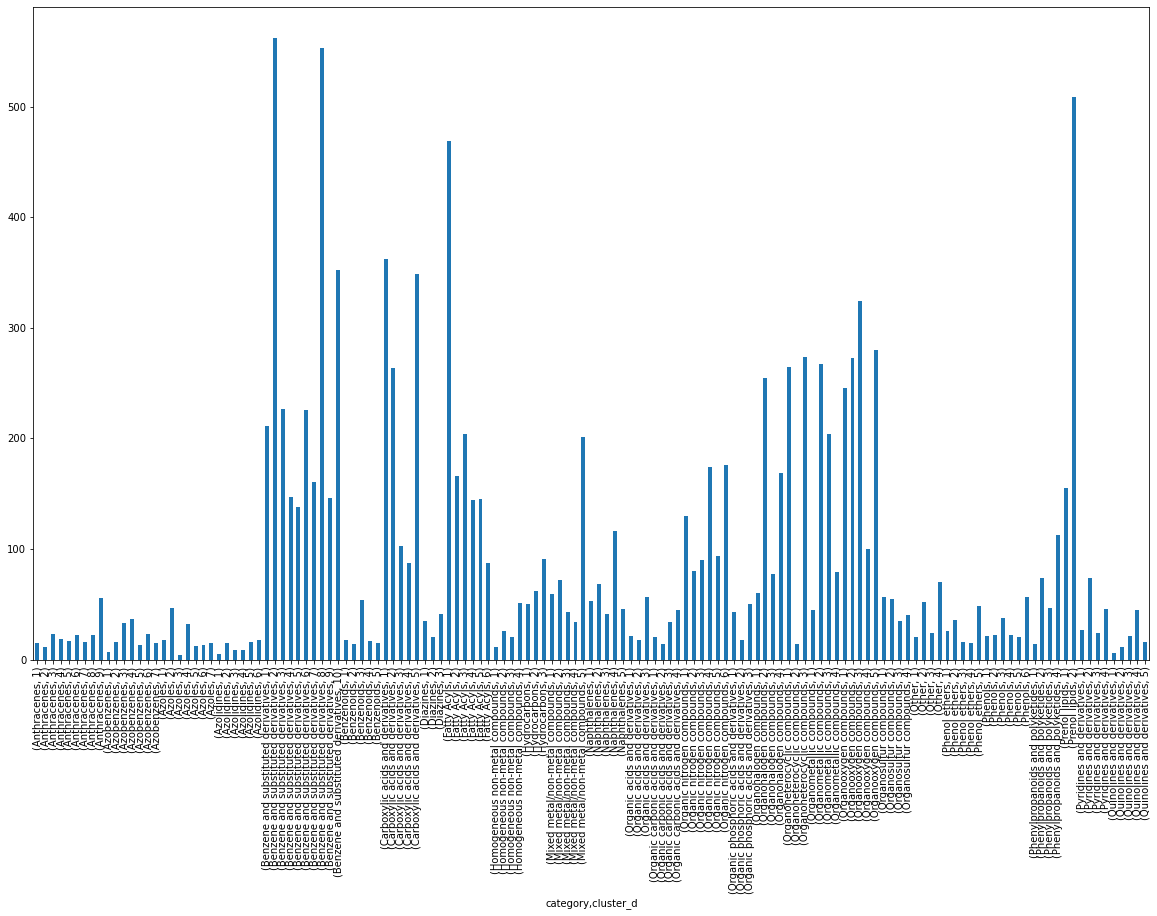

In [420]:
subcategory_df.groupby(['category',  'cluster_d']).size().plot.bar(figsize = (20,12))

In [421]:
final_wcluster = pd.merge(final_df, subcategory_df[['dtxsid', 'cluster_d']], on = 'dtxsid', how = 'left')

In [348]:
len(summaries)

29

In [422]:
subcats = final_wcluster[final_wcluster['cluster_d'].notnull()]

In [425]:
results_subcats = {}
for i, group in subcats.groupby(['ClassyFire', 'cluster_d']):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results_subcats[i] = a

In [427]:
distances_subcats = {}
for k,v in results_subcats.items():
    a = distance_matrix(results_subcats[k])
    distances_subcats[k] = a

In [428]:
centres_1 = []
for i,group in subcategory_df.groupby(['category', 'cluster_d']):
    try:
        m = medoid_calc(distances_subcats[i])
        centres_1.append(m)
    except Exception as error:
        print(error)


In [431]:
len(centres_1)

141

In [432]:
final_df['level2_cluster_centroid'] = final_df['dtxsid'].apply(lambda x: 'centroid' if x in (centres_1) else np.nan)

In [433]:
df_2 = pd.merge(final_df, subcategory_df[['dtxsid', 'cluster_d']], on = 'dtxsid', how = 'left')

In [434]:
df_3 = df_2.set_index('dtxsid')

In [435]:
members_lvl2 = {}

for i, group in df_3.groupby(['ClassyFire', 'cluster_d']):
    subset = group[['cluster_d', 'level2_cluster_centroid']]
    try: 
        for x, y in subset.iterrows():
            a, b = y
            if b == 'centroid':
                #print(x)
                c = [distances_subcats[i][x].index, distances_subcats[i][x].values]
                members_lvl2[x] = c
    except Exception as error:
            print(error)

In [436]:
members_lvl2.keys()

dict_keys(['DTXSID3061134', 'DTXSID5065271', 'DTXSID1026293', 'DTXSID8062573', 'DTXSID2025210', 'DTXSID9045055', 'DTXSID4049327', 'DTXSID1059440', 'DTXSID4058865', 'DTXSID1028025', 'DTXSID3022160', 'DTXSID90885823', 'DTXSID5063281', 'DTXSID6069117', 'DTXSID8068335', 'DTXSID40886603', 'DTXSID5066950', 'DTXSID5061457', 'DTXSID80864324', 'DTXSID6065923', 'DTXSID4052059', 'DTXSID9061546', 'DTXSID3061895', 'DTXSID0044652', 'DTXSID8066553', 'DTXSID10869908', 'DTXSID4063612', 'DTXSID4024985', 'DTXSID2029248', 'DTXSID3042219', 'DTXSID6020143', 'DTXSID0021836', 'DTXSID8040779', 'DTXSID9064631', 'DTXSID2021311', 'DTXSID6026080', 'DTXSID6026325', 'DTXSID2021868', 'DTXSID2021810', 'DTXSID6059576', 'DTXSID8047135', 'DTXSID2027175', 'DTXSID2020139', 'DTXSID3064352', 'DTXSID8025961', 'DTXSID6052299', 'DTXSID6027765', 'DTXSID3025045', 'DTXSID1022001', 'DTXSID8020129', 'DTXSID2049420', 'DTXSID4047620', 'DTXSID9047621', 'DTXSID1047651', 'DTXSID7063764', 'DTXSID3021641', 'DTXSID30886798', 'DTXSID0022010'

In [437]:
cluster_members_lvl2 = pd.DataFrame(list(members_lvl2.items()))
cluster_members_lvl2.columns = ['lvl2_centroid', 1]
cluster_members_lvl2[['lvl2_analogues','lvl2_Dist']] = pd.DataFrame(cluster_members_lvl2[1].tolist(), index= cluster_members_lvl2.index)
cluster_members_lvl2.drop([1], axis = 1, inplace = True)
cluster_members_lvl2_1 = cluster_members_lvl2.apply(pd.Series.explode)
cluster_members_lvl2_1.head()

,lvl2_centroid,lvl2_analogues,lvl2_Dist
0,DTXSID3061134,DTXSID9063083,0.850746
0,DTXSID3061134,DTXSID4061628,0.777778
0,DTXSID3061134,DTXSID1060057,0.804878
0,DTXSID3061134,DTXSID3061134,0.0
0,DTXSID3061134,DTXSID1066237,0.822222


In [438]:
df_2 = df_2.sort_values(by = ['ClassyFire','cluster_d', 'level2_cluster_centroid'], ascending = [True, True, False])

In [439]:
df_2['lvl2_centroid'] = df_2.apply(lambda x: x['dtxsid'] if x['level2_cluster_centroid'] == 'centroid' else np.nan, axis = 1)

In [440]:
df_2= df_2.sort_values(by = ['ClassyFire',  'cluster_d', 'lvl2_centroid'], ascending = [True, True, False])

In [441]:
df_2['lvl2_centroid2'] = df_2.loc[df_2.cluster_d.notnull(), 'lvl2_centroid'].fillna(method = 'ffill')

In [442]:
mydict_lvl2 = {}
for i, group in df_2.groupby('lvl2_centroid2'):
    k = [n for n in group['lvl2_centroid2'] if n != ' '][0]
    v = list(group['dtxsid'])
    mydict_lvl2[k] = v


In [443]:
dist_lvl2 = []
for i, group in cluster_members_lvl2_1.groupby('lvl2_centroid'):
    a = cluster_members_lvl2_1[(cluster_members_lvl2_1['lvl2_centroid'] == i) & (cluster_members_lvl2_1['lvl2_analogues'].isin(mydict_lvl2[i]))]
    dist_lvl2.append(a)

In [444]:
dist_lvl2_df = pd.concat([e for e in dist_lvl2])

In [445]:
df_wlvl2 = pd.merge(df_2, dist_lvl2_df[['lvl2_analogues', 'lvl2_Dist']], left_on = 'dtxsid', right_on = 'lvl2_analogues', how = 'left')

In [446]:
df_wlvl2['final_centroid'] = df_wlvl2[['centroid2', 'lvl2_centroid2']].apply(lambda x : x[1] if pd.notnull((x[1])) else x[0], axis =1)

In [447]:
df_wlvl2['final_dist'] = df_wlvl2[['Dist', 'lvl2_Dist']].apply(lambda x : x[1] if pd.notnull((x[1])) else x[0], axis =1)

In [448]:
next_gen = df_wlvl2.copy()

In [449]:
next_gen

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,Dist,lt65_picks,level2_cluster_centroid,cluster_d,lvl2_centroid,lvl2_centroid2,lvl2_analogues,lvl2_Dist,final_centroid,final_dist
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.000000
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,0.434783,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.434783
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,0.409091,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.409091
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,0.045455,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.045455
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,DTXSID7070391,"1,1'-((Phenylmethylene)bis((2-methyl-4,1-pheny...",66085-68-5,WMIMXCPQTYMGDN-UHFFFAOYSA-N,"1,1'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,InChI=1S/C41H32N4O2/c1-26-24-31(16-20-35(26)42...,C41H32N4O2,612.733,612.252526,...,0.921348,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID20888680,0.921348
14243,DTXSID70889405,"Oxirane, 2,2',2''-[methylidynetris(phenyleneox...",106253-69-4,WUULWDSQZQBRKW-UHFFFAOYSA-N,"3,3'-(2-Methyl-1,3-phenylene)bis(5-{[4-(bis{4-...",CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,InChI=1/C65H62N2O14/c1-41-60(66-29-54(80-64(66...,C65H62N2O14,1095.211,1094.420105,...,0.662162,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID20888680,0.662162
14244,DTXSID90886794,"3H-Pyrazol-3-one, 4,4'-[(phenylmethylene)bis[(...",66085-69-6,WXNBMYJCPCEWND-UHFFFAOYSA-N,"4,4'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,InChI=1/C41H36N8O2/c1-26-24-31(20-22-35(26)42-...,C41H36N8O2,672.793,672.296122,...,0.925532,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID20888680,0.925532
14245,DTXSID3073052,"Phenol, 4,4'-[1-[4-[1-(4-hydroxyphenyl)-1-meth...",110726-28-8,WXYSZTISEJBRHW-UHFFFAOYSA-N,"4,4'-(1-{4-[2-(4-Hydroxyphenyl)propan-2-yl]phe...",CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,"InChI=1S/C29H28O3/c1-28(2,21-8-14-25(30)15-9-2...",C29H28O3,424.540,424.203845,...,0.72549,0,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID20888680,0.725490


In [450]:
writer = pd.ExcelWriter(interim_dir+'tsca_medoids_120822.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

next_gen.to_excel(writer)

writer.save()